In [445]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from scipy.stats import skew
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings(action='ignore')

pd.set_option('max_column', 100)

In [446]:
origin_df = pd.read_csv('Perovskite_database_content_all_data.csv')
origin_df.head()

,Ref_ID,Ref_ID_temp,Ref_name_of_person_entering_the_data,Ref_data_entered_by_author,Ref_DOI_number,Ref_lead_author,Ref_publication_date,Ref_journal,Ref_part_of_initial_dataset,Ref_original_filename_data_upload,Ref_free_text_comment,Ref_internal_sample_id,Cell_stack_sequence,Cell_area_total,Cell_area_measured,Cell_number_of_cells_per_substrate,Cell_architecture,Cell_flexible,Cell_flexible_min_bending_radius,Cell_semitransparent,Cell_semitransparent_AVT,Cell_semitransparent_wavelength_range,Cell_semitransparent_raw_data,Module,Module_number_of_cells_in_module,Module_area_total,Module_area_effective,Module_JV_data_recalculated_per_cell,Substrate_stack_sequence,Substrate_thickness,Substrate_area,Substrate_supplier,Substrate_brand_name,Substrate_deposition_procedure,Substrate_surface_roughness_rms,Substrate_etching_procedure,Substrate_cleaning_procedure,ETL_stack_sequence,ETL_thickness,ETL_additives_compounds,ETL_additives_concentrations,ETL_deposition_procedure,ETL_deposition_aggregation_state_of_reactants,ETL_deposition_synthesis_atmosphere,ETL_deposition_synthesis_atmosphere_pressure_total,ETL_deposition_synthesis_atmosphere_pressure_partial,ETL_deposition_synthesis_atmosphere_relative_humidity,ETL_deposition_solvents,ETL_deposition_solvents_mixing_ratios,ETL_deposition_solvents_supplier,...,Stability_PCE_Ts80,Stability_PCE_Te80,Stability_PCE_Tse80,Stability_PCE_after_1000_h,Stability_lifetime_energy_yield,Stability_flexible_cell_number_of_bending_cycles,Stability_flexible_cell_bending_radius,Stability_flexible_cell_PCE_initial_value,Stability_flexible_cell_PCE_end_of_experiment,Stability_link_raw_data_for_stability_trace,Outdoor_tested,Outdoor_protocol,Outdoor_average_over_n_number_of_cells,Outdoor_location_country,Outdoor_location_city,Outdoor_location_coordinates,Outdoor_location_climate_zone,Outdoor_installation_tilt,Outdoor_installation_cardinal_direction,Outdoor_installation_number_of_solar_tracking_axis,Outdoor_time_season,Outdoor_time_start,Outdoor_time_end,Outdoor_time_total_exposure,Outdoor_potential_bias_load_condition,Outdoor_potential_bias_range,Outdoor_potential_bias_passive_resistance,Outdoor_temperature_load_condition,Outdoor_temperature_range,Outdoor_temperature_tmodule,Outdoor_periodic_JV_measurements,Outdoor_periodic_JV_measurements_time_between_measurements,Outdoor_PCE_initial_value,Outdoor_PCE_burn_in_observed,Outdoor_PCE_end_of_experiment,Outdoor_PCE_T95,Outdoor_PCE_Ts95,Outdoor_PCE_T80,Outdoor_PCE_Ts80,Outdoor_PCE_Te80,Outdoor_PCE_Tse80,Outdoor_PCE_after_1000_h,Outdoor_power_generated,Outdoor_link_raw_data_for_outdoor_trace,Outdoor_detaild_weather_data_available,Outdoor_link_detailed_weather_data,Outdoor_spectral_data_available,Outdoor_link_spectral_data,Outdoor_irradiance_measured,Outdoor_link_irradiance_data
0,1,1,Adam Hultqvist,False,10.1021/jp5126624,Sabba et al.,2015-01-06,The Journal of Physical Chemistry C,True,Historic dataset on 2020 11 22_v7.xlsx,NaN,NaN,SLG | FTO | TiO2-c | TiO2-mp | Perovskite | Sp...,NaN,0.2,0,nip,False,NaN,False,NaN,nan; nan,NaN,False,0,NaN,NaN,False,SLG | FTO,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,TiO2-c | TiO2-mp,65.0 | nan,Unknown,NaN,Spray-pyrolys | Spin-coating,Unknown,Unknown,NaN,NaN,NaN,Unknown,NaN,Unknown,...,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,False,NaN,1,NaN,NaN,nan; nan,NaN,NaN,NaN,0,NaN,0000:00:00:00:00,0000:00:00:00:00,NaN,NaN,nan; nan,NaN,NaN,nan; nan,NaN,False,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,False,NaN,False,NaN
1,2,2,Adam Hultqvist,False,10.1021/jp5126624,Sabba et al.,2015-01-06,The Journal of Physical Chemistry C,True,Historic dataset on 2020 11 22_v7.xlsx,NaN,NaN,SLG | FTO | TiO2-c | TiO2-mp | Perovskite | Sp...,NaN,0.2,0,nip,False,NaN,False,NaN,nan; nan,NaN,False,0,NaN,NaN,False,SLG | FTO,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,TiO2-c | TiO2-mp,65.0 | nan,Unknown,NaN,Spray-pyrolys | Spin-coating,Unknown,Unknown,NaN,NaN,NaN,Unknown,NaN,Unknown,...,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,False,NaN,1,NaN,NaN,nan; nan,NaN,NaN,NaN,0,NaN,0

In [447]:
df = origin_df.copy()
df.shape

(42443, 410)

In [448]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42443 entries, 0 to 42442
Data columns (total 410 columns):
 #    Column                                                           Dtype  
---   ------                                                           -----  
 0    Ref_ID                                                           int64  
 1    Ref_ID_temp                                                      int64  
 2    Ref_name_of_person_entering_the_data                             object 
 3    Ref_data_entered_by_author                                       bool   
 4    Ref_DOI_number                                                   object 
 5    Ref_lead_author                                                  object 
 6    Ref_publication_date                                             object 
 7    Ref_journal                                                      object 
 8    Ref_part_of_initial_dataset                                      bool   
 9    Ref_original_fi

### Label : JV_default_PCE

#### 다른 효율 컬럼들과 JV_default_PCE 관계 확인

In [449]:
df.filter(regex='PCE|Voc|Jsc|FF', axis=1).columns

Index(['JV_reverse_scan_Voc', 'JV_reverse_scan_Jsc', 'JV_reverse_scan_FF',
       'JV_reverse_scan_PCE', 'JV_forward_scan_Voc', 'JV_forward_scan_Jsc',
       'JV_forward_scan_FF', 'JV_forward_scan_PCE', 'JV_default_Voc',
       'JV_default_Jsc', 'JV_default_FF', 'JV_default_PCE',
       'JV_default_Voc_scan_direction', 'JV_default_Jsc_scan_direction',
       'JV_default_FF_scan_direction', 'JV_default_PCE_scan_direction',
       'Stabilised_performance_PCE', 'EQE_integrated_Jsc',
       'Stability_PCE_initial_value', 'Stability_PCE_burn_in_observed',
       'Stability_PCE_end_of_experiment', 'Stability_PCE_T95',
       'Stability_PCE_Ts95', 'Stability_PCE_T80', 'Stability_PCE_Ts80',
       'Stability_PCE_Te80', 'Stability_PCE_Tse80',
       'Stability_PCE_after_1000_h',
       'Stability_flexible_cell_PCE_initial_value',
       'Stability_flexible_cell_PCE_end_of_experiment',
       'Outdoor_PCE_initial_value', 'Outdoor_PCE_burn_in_observed',
       'Outdoor_PCE_end_of_experiment', 'Ou

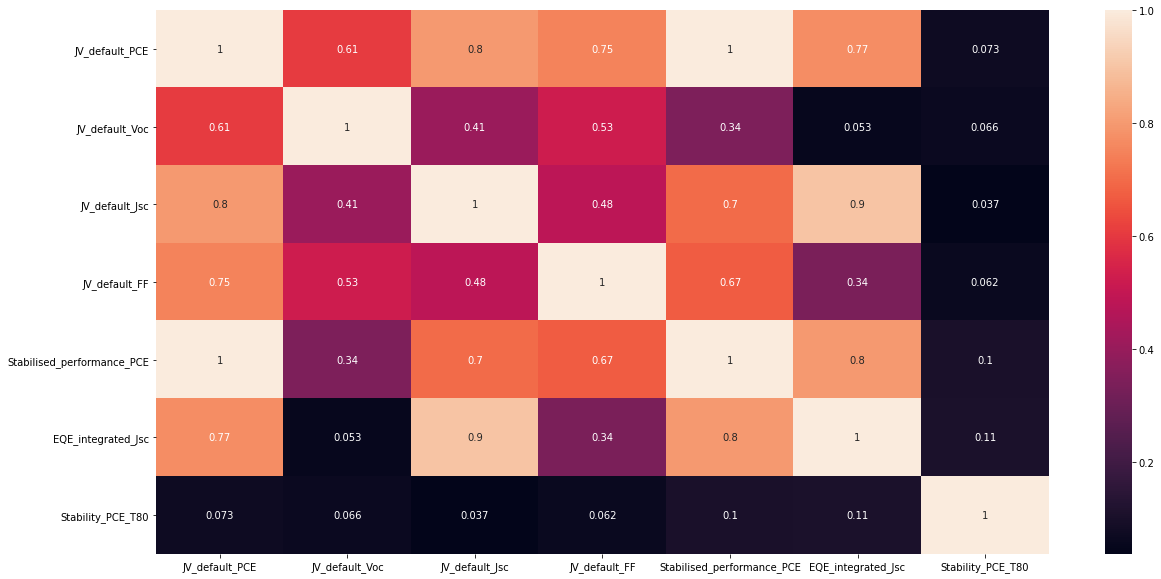

In [450]:
plt.figure(figsize = (20,10))

# Outdoor 데이터는 샘플수가 매우 적으므로 제외
# JV test 결과와 Stability_PCE_T80 결과, EQE Jsc 결과와 JV Voc 결과는 다른 효율성 지표에 비해 상관관계가 낮은 것으로 확인됨
efficiency = df[['JV_default_PCE', 'JV_default_Voc', 'JV_default_Jsc', 'JV_default_FF', 'Stabilised_performance_PCE', 'EQE_integrated_Jsc', 'Stability_PCE_T80']]
sns.heatmap(efficiency.corr(),annot = True)
plt.show()

### 전처리

사용 안할 컬럼 삭제 (410 -> 188)
    - Ref 관련 컬럼 전부 삭제
    - JV 관련 컬럼 중 y값인 JV_default_PCE 외 모든 컬럼 삭제
    - NULL값이 20000 개 이상인 컬럼 제외

In [451]:
df = df.drop(df.filter(regex='^Ref|^JV.*(?<!default_PCE)$', axis=1).columns, axis=1)
df = df.loc[:, df.isna().sum() < 20000]
df.shape

(42443, 188)

In [452]:
# dtype count
# object 컬럼이 압도적으로 많음
df.dtypes.value_counts()

object     147
bool        32
int64        7
float64      2
dtype: int64

### 공통 function

In [453]:
# 문자열 컬럼 후보군 중 valid list 결과에 컬럼 값이 포함되지 않을 경우 ETC로 변환
def stackCheck(value, valid_list):
    if value in valid_list:
        return value
    else:
        return 'ETC'
    
# bool type 변경
cat_list = {
    True: 1, False: 0
}

# stack grouping 후 나온 key list 결과에 컬럼 값이 포함되지 않을 경우 ETC로 변환        
def stackCheckByGroup(column, stack) :    
    for idx in df.index :    
        data = df.loc[idx][column]
        if (data not in stack) :
            df.loc[idx, column] = 'ETC'

# 컬럼별 value counts 보여주는 함수
def show_value_counts(df):
    for col in df.columns:
        print(f'------------------ {col} ------------------')
        print(df[col].value_counts())
        print()

# nlargest 결과 조회
def printLargestGroup(columns, cnt, flag=False, total=0) :
    for i in range(len(columns)) :
        result_cnt = 0
        for j in range(cnt) :
            if j > len(df.groupby(columns[i]).size())-1 :
                break
            result_cnt += df.groupby(columns[i]).size().nlargest(cnt).values[j]            
            print(result_cnt,',', columns[i], ' => ', df.groupby(columns[i]).size().nlargest(cnt).index[j], '(', df.groupby(columns[i]).size().nlargest(cnt).values[j], ')')
            if (flag and result_cnt > total) :
                break
                
digit_regexp = re.compile(r'\d')
# | 가 포함된 숫자 자료 컬럼을 합산 처리, meanFlag = True일시 0인 값은 mean값으로 대체        
def calTotal(column, meanFlag) :
    for idx in df.index :
        data = df.loc[idx][column]
        
        if (type(data) == str) : 
            data = data.replace('nan', '0')
            data = data.replace('x', '0')
            if (data.find('|') > -1 or data.find(';') > -1) :
                total = 0            
                for num in re.split('[;|]', data) :
                    if digit_regexp.search(num):
                        total += float(num.replace(' ', ''))
                df.loc[idx, column] = round(total, 2)
            else :            
                df.loc[idx, column] = float(data)            
            
    df[column] = df[column].astype('float')
    if meanFlag :     
        df.loc[df[column].isna(), column] = round(df[column].mean(), 2)
        df.loc[df[column] == 0, column] = round(df[column].mean(), 2)                

### 특성 주제별 전처리
#### 1. JV_default_PCE가 NULL값인 row 삭제 (42443 -> 41519)

In [454]:
df = df.dropna(subset=['JV_default_PCE']).reset_index(drop=True)
df.shape

(41519, 188)

#### 2. Cell 컬럼 처리
- Cell_area_measured : null 값 -> median(0.1)으로 대체
- Cell_semitransparent_wavelength_range는 nan; nan 값만 존재 -> 삭제
- Cell_architecture는 nip, pin가 전체 데이터의 99%를 차지 -> nip, pin 이외에는 ETC로 변환
- Cell_flexible, Cell_semitransparent는 True: 1, False: 0로 변환
- Cell_stack_sequence : 전체 구조를 한 번에 나타내는 컬럼으로, 다른 하위 구조의 sequence 컬럼으로 대체해서 사용 -> 삭제

In [455]:
# Cell_area_measured
print('Cell_area_measured median : ', df['Cell_area_measured'].median())
df['Cell_area_measured'] = df['Cell_area_measured'].fillna(df['Cell_area_measured'].median())

Cell_area_measured median :  0.1


In [456]:
# Cell_semitransparent_wavelength_range 삭제
df = df.drop('Cell_semitransparent_wavelength_range', axis=1)

# Cell_architecture는 nip, pin이 메인. 그 외는 ETC로
df['Cell_architecture'] = df.Cell_architecture.apply(lambda x: stackCheck(x, ['nip', 'pin']))
print('Cell_architecture :', df['Cell_architecture'].value_counts())

# Cell_flexible
df['Cell_flexible'] = df['Cell_flexible'].map(cat_list)

# Cell_semitransparent
df['Cell_semitransparent'] = df['Cell_semitransparent'].map(cat_list)

# Cell_stack_sequence 컬럼 삭제
df = df.drop('Cell_stack_sequence', axis=1)

Cell_architecture : nip    28966
pin    12502
ETC       51
Name: Cell_architecture, dtype: int64


In [457]:
print(df[df.filter(regex='^Cell', axis=1).columns].info())
df[df.filter(regex='^Cell', axis=1).columns].head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41519 entries, 0 to 41518
Data columns (total 5 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Cell_area_measured                  41519 non-null  float64
 1   Cell_number_of_cells_per_substrate  41519 non-null  int64  
 2   Cell_architecture                   41519 non-null  object 
 3   Cell_flexible                       41519 non-null  int64  
 4   Cell_semitransparent                41519 non-null  int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 1.6+ MB
None


,Cell_area_measured,Cell_number_of_cells_per_substrate,Cell_architecture,Cell_flexible,Cell_semitransparent
0,0.2,0,nip,0,0
1,0.2,0,nip,0,0
2,0.2,0,nip,0,0
3,0.2,0,nip,0,0
4,0.2,0,nip,0,0


#### 3. Module 컬럼 처리
- Module_number_of_cells_in_module : 0인 값이 41192개, max값이 36으로 튀는 경향을 보임
- Module, Module_JV_data_recalculated_per_cell : True: 1, False: 0로 변환

In [458]:
# Module
df['Module'] = df['Module'].map(cat_list)

# Module_JV_data_recalculated_per_cell
df['Module_JV_data_recalculated_per_cell'] = df['Module_JV_data_recalculated_per_cell'].map(cat_list)

#### 4. Substrate 컬럼 처리
- Substrate_stack_sequence : 대부분의 데이터가 "SLG | FTO", "SLG | ITO"로 구성되어 있음 -> 그 외에는 ETC 처리
- Substrate_deposition_procedure : 40598개 데이터가 Unknown -> 삭제

In [459]:
# 컬럼 변경 전, space 정보 남기기
# Every layer should be separated by a space, a vertical bar, and a space, i.e. (‘ | ‘)
df['Substrate_stack_sequence_space'] = df['Substrate_stack_sequence'].apply(
    lambda x: x.count('|'))
df['Substrate_stack_sequence_space'] += 1
df['Substrate_stack_sequence_space'].value_counts()

2     41191
1       185
3        88
4        42
5        12
11        1
Name: Substrate_stack_sequence_space, dtype: int64

In [460]:
print(df.groupby('Substrate_stack_sequence').size().nlargest())

# Substrate_stack_sequence
df['Substrate_stack_sequence'] = df['Substrate_stack_sequence'].apply(lambda x: stackCheck(x, ['SLG | FTO', 'SLG | ITO']))

# Substrate_deposition_procedure
df = df.drop('Substrate_deposition_procedure', axis=1)

Substrate_stack_sequence
SLG | FTO    25638
SLG | ITO    14533
PET | ITO      371
PEN | ITO      222
PET | IZO       62
dtype: int64


In [461]:
print(df.groupby('Substrate_stack_sequence').size().nlargest())

Substrate_stack_sequence
SLG | FTO    25638
SLG | ITO    14533
ETC           1348
dtype: int64


#### 5. ETL 컬럼 처리
- ETL_stack_sequence : nlargest로 정렬 합산하여 2.9만개(약 70%)까지의 데이터만 유지, 그 외에는 ETC로 변환
- ETL_deposition_procedure : nlargest로 정렬 합산하여 2.9만개(약 70%)까지의 데이터만 유지, 그 외에는 ETC로 변환, 중복되는 값들은 하나로 변환 (Spin-coating, Evaporation)
- Unknown이 대부분인 컬럼 삭제
    - ETL_additives_compounds  =>  Unknown ( 32953 )
    - ETL_deposition_aggregation_state_of_reactants  =>  Unknown ( 39673 )
    - ETL_deposition_synthesis_atmosphere  =>  Unknown ( 40041 )
    - ETL_deposition_solvents  =>  Unknown ( 39837 )
    - ETL_deposition_solvents_supplier  =>  Unknown ( 41229 )
    - ETL_deposition_solvents_purity  =>  Unknown ( 41383 )
    - ETL_deposition_reaction_solutions_compounds_supplier  =>  Unknown ( 40947 )
    - ETL_deposition_reaction_solutions_compounds_purity  =>  Unknown ( 41355 )
    - ETL_deposition_reaction_solutions_volumes  =>  Unknown ( 41386 )
    - ETL_deposition_reaction_solutions_age  =>  Unknown ( 41446 )
    - ETL_deposition_reaction_solutions_temperature  =>  Unknown ( 40994 )
    - ETL_deposition_substrate_temperature  =>  Unknown ( 40810 )
    - ETL_deposition_thermal_annealing_temperature  =>  Unknown ( 39761 )
    - ETL_deposition_thermal_annealing_time  =>  Unknown ( 39882 )
    - ETL_deposition_thermal_annealing_atmosphere  =>  Unknown ( 40763 )
    - ETL_storage_atmosphere  =>  Unknown ( 41488 )

In [462]:
# top value가 Unknow인 컬럼 삭제
df = df.drop(['ETL_additives_compounds',
'ETL_deposition_aggregation_state_of_reactants',
'ETL_deposition_synthesis_atmosphere',
'ETL_deposition_solvents',
'ETL_deposition_solvents_supplier',
'ETL_deposition_solvents_purity',
'ETL_deposition_reaction_solutions_compounds_supplier',
'ETL_deposition_reaction_solutions_compounds_purity',
'ETL_deposition_reaction_solutions_volumes',
'ETL_deposition_reaction_solutions_age',
'ETL_deposition_reaction_solutions_temperature',
'ETL_deposition_substrate_temperature',
'ETL_deposition_thermal_annealing_temperature',
'ETL_deposition_thermal_annealing_time',
'ETL_deposition_thermal_annealing_atmosphere',
'ETL_storage_atmosphere'], axis=1)

In [463]:
# ETL_stack_sequence_space 컬럼 변경 전, space 정보 남기기
df['ETL_stack_sequence_space'] = df['ETL_stack_sequence'].apply(lambda x: x.count('|'))
df['ETL_stack_sequence_space'] += 1

# ETL_deposition_procedure 컬럼 변경 전, space & step 정보 남기기
df['ETL_deposition_procedure_space'] = df['ETL_deposition_procedure'].apply(lambda x: x.count('|'))
df['ETL_deposition_procedure_space'] += 1

# df['ETL_deposition_procedure_step'] = df['ETL_deposition_procedure'].apply(lambda x: x.count('>>'))
# df['ETL_deposition_procedure_step'] += 1

In [464]:
printLargestGroup(list(df.filter(regex='^ETL', axis=1)), 11, True, 29000)

# ETL_stack_sequence  
ETL_stack = df.groupby('ETL_stack_sequence').filter(lambda a : len(a) >= 630).groupby('ETL_stack_sequence').size()
stackCheckByGroup('ETL_stack_sequence', ETL_stack)     

# ETL_deposition_procedure  
df['ETL_deposition_procedure'] = df['ETL_deposition_procedure'].replace('Spin-coating | Spin-coating', 'Spin-coating')
df['ETL_deposition_procedure'] = df['ETL_deposition_procedure'].replace('Evaporation | Evaporation', 'Evaporation')
ETL_dps_procedure = df.groupby('ETL_deposition_procedure').filter(lambda a : len(a) >= 4499).groupby('ETL_deposition_procedure').size()
stackCheckByGroup('ETL_deposition_procedure', ETL_dps_procedure) 

11392 , ETL_stack_sequence  =>  TiO2-c | TiO2-mp ( 11392 )
18128 , ETL_stack_sequence  =>  TiO2-c ( 6736 )
21350 , ETL_stack_sequence  =>  PCBM-60 ( 3222 )
23962 , ETL_stack_sequence  =>  PCBM-60 | BCP ( 2612 )
25573 , ETL_stack_sequence  =>  SnO2-np ( 1611 )
27047 , ETL_stack_sequence  =>  C60 | BCP ( 1474 )
28395 , ETL_stack_sequence  =>  SnO2-c ( 1348 )
29025 , ETL_stack_sequence  =>  TiO2-c | TiO2-mp | ZrO2-mp ( 630 )
12038 , ETL_deposition_procedure  =>  Spin-coating ( 12038 )
23526 , ETL_deposition_procedure  =>  Spin-coating | Spin-coating ( 11488 )
28025 , ETL_deposition_procedure  =>  Spray-pyrolys | Spin-coating ( 4499 )
29708 , ETL_deposition_procedure  =>  Evaporation | Evaporation ( 1683 )
22343 , ETL_stack_sequence_space  =>  2 ( 22343 )
38740 , ETL_stack_sequence_space  =>  1 ( 16397 )
22166 , ETL_deposition_procedure_space  =>  2 ( 22166 )
38740 , ETL_deposition_procedure_space  =>  1 ( 16574 )


#### 6. Perovskite 컬럼 처리
- bool type 컬럼 : True: 1, False: 0로 변환
- Perovskite_composition_long_form : ions 값 사용하므로 삭제
- Perovskite_composition_short_form : ions 값 사용하므로 삭제
- Perovskite_band_gap_estimation_basis : bandgap 측정 방식 -> 삭제
- nlargest로 정렬 합산하여 3.8만개(약 90%)까지의 데이터만 유지, 그 외에는 ETC로 변환
    - Perovskite_deposition_synthesis_atmosphere : 'N2 >> N2' -> 'N2'로 변환, 'Air >> Air' -> 'Air로 변환
    - Perovskite_composition_a_ions : na값은 기존에 가장 많은 MA(28072)로 대체
    - Perovskite_composition_b_ions : na값은 기존에 가장 많은 Pb(39504)로 대체
    - Perovskite_composition_c_ions : na값은 기존에 가장 많은 I(31349)로 대체
    - Perovskite_deposition_procedure 
    - Perovskite_deposition_aggregation_state_of_reactants 
- nlargest로 정렬 합산하여 2.9만개(약 70%)까지의 데이터만 유지, 그 외에는 ETC로 변환
    - Perovskite_deposition_solvents_mixing_ratios : '1 >> 1' -> 1로 변환     
    - Perovskite_deposition_solvents 
- Perovskite_dimension_list_of_layers : 결과에서 3.0인 value가 40067개 -> 그 외의 값은 ETC 처리
- Perovskite_band_gap : 1.6값이 22236개 존재 -> na값은 1.6으로 치환
- Perovskite_composition_a_ions_coefficients : 1 or ETC
- Perovskite_composition_b_ions_coefficients : 1(1.0 포함), ETC
- Perovskite_composition_c_ions_coefficients : 3, ETC
- Unknown이 대부분인 컬럼 삭제
    - Perovskite_deposition_solvents_supplier  =>  Unknown ( 41004 )
    - Perovskite_deposition_solvents_purity  =>  Unknown ( 41353 )
    - Perovskite_deposition_reaction_solutions_compounds_supplier  =>  Unknown ( 40961 )
    - Perovskite_deposition_reaction_solutions_compounds_purity  =>  Unknown ( 41229 )
    - Perovskite_deposition_reaction_solutions_volumes  =>  Unknown ( 41277 )
    - Perovskite_deposition_reaction_solutions_age  =>  Unknown ( 41275 )
    - Perovskite_deposition_reaction_solutions_temperature  =>  Unknown ( 40832 )
    - Perovskite_deposition_substrate_temperature  =>  Unknown ( 40779 )
    - Perovskite_deposition_quenching_media_volume  =>  Unknown ( 40816 )
    - Perovskite_deposition_thermal_annealing_atmosphere  =>  Unknown ( 40237 )
    - Perovskite_deposition_solvent_annealing_solvent_atmosphere  =>  Unknown ( 40826 )
    - Perovskite_deposition_solvent_annealing_time  =>  Unknown ( 41303 )
    - Perovskite_deposition_solvent_annealing_temperature  =>  Unknown ( 41397 )
    - Perovskite_storage_time_until_next_deposition_step  =>  Unknown ( 41440 )
    - Perovskite_storage_atmosphere  =>  Unknown ( 41373 )
    - Perovskite_deposition_quenching_media  =>  Unknown ( 21961 )

In [465]:
# bool type 컬럼 처리
bool_list = ['Perovskite_single_crystal',
'Perovskite_dimension_0D',
'Perovskite_dimension_2D',
'Perovskite_dimension_2D3D_mixture',
'Perovskite_dimension_3D',
'Perovskite_dimension_3D_with_2D_capping_layer',
'Perovskite_composition_perovskite_ABC3_structure',
'Perovskite_composition_perovskite_inspired_structure',
'Perovskite_composition_inorganic',
'Perovskite_composition_leadfree',
'Perovskite_band_gap_graded',
'Perovskite_deposition_quenching_induced_crystallisation',
'Perovskite_deposition_solvent_annealing']

for col in bool_list:
    df[col] = df[col].map(cat_list)
    
# Perovskite_composition_long_form
df = df.drop('Perovskite_composition_long_form', axis=1)

# Perovskite_composition_short_form
df = df.drop('Perovskite_composition_short_form', axis=1)   

# Perovskite_band_gap_estimation_basis
df = df.drop('Perovskite_band_gap_estimation_basis', axis=1)  

# Unknown이 대부분인 값 삭제
df = df.drop(['Perovskite_deposition_solvents_supplier',
'Perovskite_deposition_solvents_purity',
'Perovskite_deposition_reaction_solutions_compounds_supplier',
'Perovskite_deposition_reaction_solutions_compounds_purity',
'Perovskite_deposition_reaction_solutions_volumes',
'Perovskite_deposition_reaction_solutions_age',
'Perovskite_deposition_reaction_solutions_temperature',
'Perovskite_deposition_substrate_temperature',
'Perovskite_deposition_quenching_media',
'Perovskite_deposition_quenching_media_volume',
'Perovskite_deposition_thermal_annealing_temperature',
'Perovskite_deposition_thermal_annealing_time',
'Perovskite_deposition_thermal_annealing_atmosphere',
'Perovskite_deposition_solvent_annealing_solvent_atmosphere',
'Perovskite_deposition_solvent_annealing_time',
'Perovskite_deposition_solvent_annealing_temperature',
'Perovskite_storage_time_until_next_deposition_step',
'Perovskite_storage_atmosphere'], axis=1)

df.shape

(41519, 151)

In [466]:
perovskite_subdf = df.copy()

In [467]:
# Perovskite_deposition_synthesis_atmosphere
df['Perovskite_deposition_synthesis_atmosphere'] = df['Perovskite_deposition_synthesis_atmosphere'].replace('N2 >> N2', 'N2')
df['Perovskite_deposition_synthesis_atmosphere'] = df['Perovskite_deposition_synthesis_atmosphere'].replace('Air >> Air', 'Air')
df['Perovskite_deposition_synthesis_atmosphere'] = df['Perovskite_deposition_synthesis_atmosphere'].replace('Ar', 'Air')
printLargestGroup(['Perovskite_deposition_synthesis_atmosphere'], 15, True, 38000)
df['Perovskite_deposition_synthesis_atmosphere'] = df['Perovskite_deposition_synthesis_atmosphere'].apply(
    lambda x: stackCheck(x, ['N2', 'Air', 'Unknown']))

16964 , Perovskite_deposition_synthesis_atmosphere  =>  N2 ( 16964 )
31513 , Perovskite_deposition_synthesis_atmosphere  =>  Unknown ( 14549 )
37487 , Perovskite_deposition_synthesis_atmosphere  =>  Air ( 5974 )
38120 , Perovskite_deposition_synthesis_atmosphere  =>  Dry air ( 633 )


In [468]:
# Perovskite_deposition_solvents_mixing_ratios
df['Perovskite_deposition_solvents_mixing_ratios'] = df['Perovskite_deposition_solvents_mixing_ratios'].replace('1 >> 1', '1')
df['Perovskite_deposition_solvents_mixing_ratios'] = df['Perovskite_deposition_solvents_mixing_ratios'].replace('1 >> 1 >> 1', '1')
printLargestGroup(['Perovskite_deposition_solvents_mixing_ratios'], 15, True, 30000)
df['Perovskite_deposition_solvents_mixing_ratios'] = df['Perovskite_deposition_solvents_mixing_ratios'].\
    apply(lambda x: stackCheck(x, ['1', '4; 1', '3; 7', '9; 1', '7; 3']))

19721 , Perovskite_deposition_solvents_mixing_ratios  =>  1 ( 19721 )
27056 , Perovskite_deposition_solvents_mixing_ratios  =>  4; 1 ( 7335 )
29402 , Perovskite_deposition_solvents_mixing_ratios  =>  3; 7 ( 2346 )
31526 , Perovskite_deposition_solvents_mixing_ratios  =>  9; 1 ( 2124 )


In [469]:
# Perovskite_composition_a_ions
df['Perovskite_composition_a_ions'] = df['Perovskite_composition_a_ions'].fillna('MA')
printLargestGroup(['Perovskite_composition_a_ions'], 15, True, 38000)
df['Perovskite_composition_a_ions'] = df['Perovskite_composition_a_ions'].apply(
    lambda x: stackCheck(x, ['MA', 'FA; MA', 'Cs; FA; MA', 'Cs', 'Cs; FA']))

# Perovskite_composition_b_ions
df['Perovskite_composition_b_ions'] = df['Perovskite_composition_b_ions'].fillna('Pb')
printLargestGroup(['Perovskite_composition_b_ions'], 15, True, 38000)
df['Perovskite_composition_b_ions'] = df['Perovskite_composition_b_ions'].apply(lambda x: stackCheck(x, ['Pb']))   

# Perovskite_composition_c_ions
df['Perovskite_composition_c_ions'] = df['Perovskite_composition_c_ions'].fillna('I')
printLargestGroup(['Perovskite_composition_c_ions'], 15, True, 38000)
df['Perovskite_composition_c_ions'] = df['Perovskite_composition_c_ions'].apply(lambda x: stackCheck(x, ['I', 'Br; I']))

28101 , Perovskite_composition_a_ions  =>  MA ( 28101 )
31956 , Perovskite_composition_a_ions  =>  FA; MA ( 3855 )
35664 , Perovskite_composition_a_ions  =>  Cs; FA; MA ( 3708 )
37684 , Perovskite_composition_a_ions  =>  Cs ( 2020 )
38686 , Perovskite_composition_a_ions  =>  Cs; FA ( 1002 )
39509 , Perovskite_composition_b_ions  =>  Pb ( 39509 )
31354 , Perovskite_composition_c_ions  =>  I ( 31354 )
40190 , Perovskite_composition_c_ions  =>  Br; I ( 8836 )


In [470]:
# Perovskite_deposition_procedure
df['Perovskite_deposition_procedure'] = df['Perovskite_deposition_procedure'].replace('Spin-coating >> Spin-coating', 'Spin-coating')
printLargestGroup(['Perovskite_deposition_procedure'], 15, True, 38000)
perovskite_dps_precedure = df.groupby('Perovskite_deposition_procedure').filter(lambda a : len(a) > 567).groupby('Perovskite_deposition_procedure').size()
stackCheckByGroup('Perovskite_deposition_procedure', perovskite_dps_precedure)

33717 , Perovskite_deposition_procedure  =>  Spin-coating ( 33717 )
36858 , Perovskite_deposition_procedure  =>  Spin-coating >> CBD ( 3141 )
37473 , Perovskite_deposition_procedure  =>  Drop-infiltration ( 615 )
38016 , Perovskite_deposition_procedure  =>  Spin-coating >> Gas reaction ( 543 )


In [471]:
# Perovskite_deposition_aggregation_state_of_reactants
df['Perovskite_deposition_aggregation_state_of_reactants'] = df['Perovskite_deposition_aggregation_state_of_reactants'].replace('Liquid >> Liquid', 'Liquid')
df.loc[df['Perovskite_deposition_aggregation_state_of_reactants'] != 'Liquid', 'Perovskite_deposition_aggregation_state_of_reactants'] = 'ETC'

In [472]:
# Perovskite_deposition_solvents
printLargestGroup(['Perovskite_deposition_solvents'], 15, True, 29000)
perovskite_dps_solvent = df.groupby('Perovskite_deposition_solvents').filter(lambda a : len(a) > 2903).groupby('Perovskite_deposition_solvents').size()
stackCheckByGroup('Perovskite_deposition_solvents', perovskite_dps_solvent)  

13569 , Perovskite_deposition_solvents  =>  DMF; DMSO ( 13569 )
22154 , Perovskite_deposition_solvents  =>  DMF ( 8585 )
27637 , Perovskite_deposition_solvents  =>  DMF >> IPA ( 5483 )
30571 , Perovskite_deposition_solvents  =>  DMSO; GBL ( 2934 )


In [473]:
# Perovskite_dimension_list_of_layers
# 3.0, ETC 2개로
df['Perovskite_dimension_list_of_layers'] = df['Perovskite_dimension_list_of_layers'].fillna('3.0')
df['Perovskite_dimension_list_of_layers'] = df['Perovskite_dimension_list_of_layers'].apply(
    lambda x: stackCheck(x, ['3.0']))
df['Perovskite_dimension_list_of_layers'].value_counts()

3.0    40056
ETC     1463
Name: Perovskite_dimension_list_of_layers, dtype: int64

In [474]:
# Perovskite_composition_a_ions_coefficients
# 1, ETC 2개로
df['Perovskite_composition_a_ions_coefficients'] = df['Perovskite_composition_a_ions_coefficients'].fillna('1')
df['Perovskite_composition_a_ions_coefficients'] = df['Perovskite_composition_a_ions_coefficients'].apply(
    lambda x: stackCheck(x, ['1']))
df['Perovskite_composition_a_ions_coefficients'].value_counts()

# Perovskite_composition_b_ions_coefficients
# 1(1.0 포함), ETC 2개로
df['Perovskite_composition_b_ions_coefficients'] = df['Perovskite_composition_b_ions_coefficients'].fillna('1')
df['Perovskite_composition_b_ions_coefficients'] = df['Perovskite_composition_b_ions_coefficients'].replace('1.0', '1').apply(
    lambda x: stackCheck(x, ['1']))
df['Perovskite_composition_b_ions_coefficients'].value_counts()

# Perovskite_composition_c_ions_coefficients
# 3, ETC 2개로
df['Perovskite_composition_c_ions_coefficients'] = df['Perovskite_composition_c_ions_coefficients'].fillna('3')
df['Perovskite_composition_c_ions_coefficients'] = df['Perovskite_composition_c_ions_coefficients'].replace('1.0', '1').apply(
    lambda x: stackCheck(x, ['3']))

print(df['Perovskite_composition_a_ions_coefficients'].value_counts())
print(df['Perovskite_composition_b_ions_coefficients'].value_counts())
print(df['Perovskite_composition_c_ions_coefficients'].value_counts())

1      31023
ETC    10496
Name: Perovskite_composition_a_ions_coefficients, dtype: int64
1      39433
ETC     2086
Name: Perovskite_composition_b_ions_coefficients, dtype: int64
3      31154
ETC    10365
Name: Perovskite_composition_c_ions_coefficients, dtype: int64


In [475]:
# Perovskite_band_gap
# NULL값 채우기 -> 1.6 (most freq)

print(df.Perovskite_band_gap.describe())

df['Perovskite_band_gap'] = df.Perovskite_band_gap.fillna(
    '1.6').apply(lambda x: str(x).strip())
df['Perovskite_band_gap'].value_counts()

count     31247.0
unique      394.0
top           1.6
freq      20882.0
Name: Perovskite_band_gap, dtype: float64


1.6      32508
1.5       1048
1.55       999
1.59       890
1.48       405
         ...  
1.957        1
1.845        1
1.751        1
1.606        1
1.578        1
Name: Perovskite_band_gap, Length: 311, dtype: int64

In [476]:
# ' | ' 포함된 문자열 처리
df.loc[df['Perovskite_band_gap'].str.contains(' | '), 'Perovskite_band_gap']

37261     1.63 | nan
37263     1.63 | nan
37638    1.58 | 2.08
37640    1.58 | 2.08
41087     1.91 | 1.8
41089     1.91 | 1.8
41090     1.91 | 1.8
41091     1.91 | 1.8
41092     1.91 | 1.8
41093     1.91 | 1.8
41113     1.6 | 1.68
41115     1.6 | 1.68
41117     1.6 | 1.68
41118     1.6 | 1.68
41120     1.6 | 1.68
Name: Perovskite_band_gap, dtype: object

In [477]:
# 얼마 안되는 케이스라 | 앞에 값(첫 번째 space 값)으로 변경
df['Perovskite_band_gap'] = df['Perovskite_band_gap'].apply(
    lambda x: re.sub(r' \|.+', '', x)).apply(lambda x: float(x))
df['Perovskite_band_gap'].value_counts()

1.600    32513
1.500     1048
1.550      999
1.590      890
1.480      405
         ...  
2.139        1
1.974        1
1.855        1
1.757        1
1.872        1
Name: Perovskite_band_gap, Length: 307, dtype: int64

#### 7. HTL 컬럼 처리
- HTL_stack_sequence : 3만개 데이터 중 none값이 있으므로, 해당 그룹 제외하고 2.9만(약 70%)개 그룹핑, 나머지 ETC로 처리
- HTL_deposition_procedure : 'Spin-coating | Spin-coating' -> Spin-coating로 변환휴 35672개 존재하는 Spin-coating와 나머지 ETC로 처리
- HTL_additives_compounds : na값이 17977개이고, 그룹핑했을 때 최대값이 21개 -> one hot 인코딩시 과적합 우려가 있으므로 삭제

- Unknown이 대부분인 값 삭제
    - HTL_deposition_aggregation_state_of_reactants  =>  Unknown ( 39529 )
    - HTL_deposition_synthesis_atmosphere  =>  Unknown ( 40448 )
    - HTL_deposition_solvents  =>  Unknown ( 39905 )
    - HTL_deposition_solvents_supplier  =>  Unknown ( 41313 )
    - HTL_deposition_solvents_purity  =>  Unknown ( 41463 )
    - HTL_deposition_reaction_solutions_compounds_supplier  =>  Unknown ( 41078 )
    - HTL_deposition_reaction_solutions_compounds_purity  =>  Unknown ( 41443 )
    - HTL_deposition_reaction_solutions_volumes  =>  Unknown ( 41383 )
    - HTL_deposition_reaction_solutions_age  =>  Unknown ( 41472 )
    - HTL_deposition_reaction_solutions_temperature  =>  Unknown ( 41147 )
    - HTL_deposition_substrate_temperature  =>  Unknown ( 41143 )
    - HTL_deposition_thermal_annealing_temperature  =>  Unknown ( 40473 )
    - HTL_deposition_thermal_annealing_time  =>  Unknown ( 40904 )
    - HTL_deposition_thermal_annealing_atmosphere  =>  Unknown ( 40975 )
    - HTL_storage_time_until_next_deposition_step  =>  Unknown ( 41444 )
    - HTL_storage_atmosphere  =>  Unknown ( 41386 )

In [478]:
printLargestGroup(list(df.filter(regex='^HTL', axis=1)), 1)

20431 , HTL_stack_sequence  =>  Spiro-MeOTAD ( 20431 )
16211 , HTL_additives_compounds  =>  Li-TFSI; TBP ( 16211 )
34913 , HTL_deposition_procedure  =>  Spin-coating ( 34913 )
39529 , HTL_deposition_aggregation_state_of_reactants  =>  Unknown ( 39529 )
40448 , HTL_deposition_synthesis_atmosphere  =>  Unknown ( 40448 )
39905 , HTL_deposition_solvents  =>  Unknown ( 39905 )
41313 , HTL_deposition_solvents_supplier  =>  Unknown ( 41313 )
41463 , HTL_deposition_solvents_purity  =>  Unknown ( 41463 )
41078 , HTL_deposition_reaction_solutions_compounds_supplier  =>  Unknown ( 41078 )
41443 , HTL_deposition_reaction_solutions_compounds_purity  =>  Unknown ( 41443 )
41383 , HTL_deposition_reaction_solutions_volumes  =>  Unknown ( 41383 )
41472 , HTL_deposition_reaction_solutions_age  =>  Unknown ( 41472 )
41147 , HTL_deposition_reaction_solutions_temperature  =>  Unknown ( 41147 )
41143 , HTL_deposition_substrate_temperature  =>  Unknown ( 41143 )
40473 , HTL_deposition_thermal_annealing_tempe

In [479]:
# 컬럼 삭제
df = df.drop(['HTL_additives_compounds',
'HTL_deposition_aggregation_state_of_reactants',
'HTL_deposition_synthesis_atmosphere',
'HTL_deposition_solvents',
'HTL_deposition_solvents_supplier',
'HTL_deposition_solvents_purity',
'HTL_deposition_reaction_solutions_compounds_supplier',
'HTL_deposition_reaction_solutions_compounds_purity',
'HTL_deposition_reaction_solutions_volumes',
'HTL_deposition_reaction_solutions_age',
'HTL_deposition_reaction_solutions_temperature',
'HTL_deposition_substrate_temperature',
'HTL_deposition_thermal_annealing_temperature',
'HTL_deposition_thermal_annealing_time',
'HTL_deposition_thermal_annealing_atmosphere',
'HTL_storage_time_until_next_deposition_step',
'HTL_storage_atmosphere'], axis=1)
df.shape

(41519, 134)

In [480]:
# # HTL_stack_sequence 컬럼 변경 전, space 정보 남기기
df['HTL_stack_sequence_space'] = df['HTL_stack_sequence'].apply(
    lambda x: x.count('|'))
df['HTL_stack_sequence_space'] += 1

# # HTL_deposition_procedure 컬럼 변경 전, space & step 정보 남기기
df['HTL_deposition_procedure_space'] = df['HTL_deposition_procedure'].apply(
    lambda x: x.count('|'))
df['HTL_deposition_procedure_space'] += 1

# # df['HTL_deposition_procedure_step'] = df['HTL_deposition_procedure'].apply(
# #     lambda x: x.count('>>'))
# # df['HTL_deposition_procedure_step'] += 1

# print(df['HTL_stack_sequence_space'].value_counts())
# print(df['HTL_deposition_procedure_space'].value_counts())
# # print(df['HTL_deposition_procedure_step'].value_counts())

In [481]:
# HTL_stack_sequence : 3만개 데이터 중 none값이 있으므로, 해당 그룹 제외하고 3만개 처리
printLargestGroup(['HTL_stack_sequence'], 15, True, 32000)
df['HTL_stack_sequence'] = df.HTL_stack_sequence.apply(lambda x: stackCheck(x, ['Spiro-MeOTAD', 'PEDOT:PSS', 'PTAA', 'NiO-c']))

# HTL_deposition_procedure : 35672개 존재하는 Spin-coating와 나머지 ETC로 처리
df['HTL_deposition_procedure'] = df['HTL_deposition_procedure'].replace('Spin-coating | Spin-coating', 'Spin-coating')
printLargestGroup(['HTL_deposition_procedure'], 15, True, 29000)
df['HTL_deposition_procedure'] = df.HTL_deposition_procedure.apply(lambda x: stackCheck(x, ['Spin-coating']))

20431 , HTL_stack_sequence  =>  Spiro-MeOTAD ( 20431 )
26906 , HTL_stack_sequence  =>  PEDOT:PSS ( 6475 )
29478 , HTL_stack_sequence  =>  none ( 2572 )
31261 , HTL_stack_sequence  =>  PTAA ( 1783 )
32911 , HTL_stack_sequence  =>  NiO-c ( 1650 )
36224 , HTL_deposition_procedure  =>  Spin-coating ( 36224 )


#### 8. Backcontact 컬럼 처리
- Backcontact_thickness_list : na값 7823 존재 -> 12300개 존재하는 100으로 대체
- nlargest로 정렬 합산하여 3.7만개(약 90%) 이상 항목까지의 데이터만 유지, 그 외에는 ETC로 변환
    - Backcontact_stack_sequence
    - Backcontact_deposition_procedure : 'Evaporation | Evaporation' -> 'Evaporation'로 변환   
- Unknown이 대부분인 값 삭제
    - Backcontact_deposition_aggregation_state_of_reactants  =>  Unknown ( 39722 )
    - Backcontact_deposition_synthesis_atmosphere  =>  Unknown ( 39937 )
    - Backcontact_deposition_solvents  =>  Unknown ( 40566 )
    - Backcontact_deposition_solvents_supplier  =>  Unknown ( 41513 )
    - Backcontact_deposition_solvents_purity  =>  Unknown ( 41519 )
    - Backcontact_deposition_reaction_solutions_compounds_supplier  =>  Unknown ( 41476 )
    - Backcontact_deposition_reaction_solutions_compounds_purity  =>  Unknown ( 41506 )
    - Backcontact_deposition_reaction_solutions_volumes  =>  Unknown ( 41518 )
    - Backcontact_deposition_reaction_solutions_age  =>  Unknown ( 41519 )
    - Backcontact_deposition_reaction_solutions_temperature  =>  Unknown ( 41271 )
    - Backcontact_deposition_substrate_temperature  =>  Unknown ( 41056 )
    - Backcontact_deposition_thermal_annealing_temperature  =>  Unknown ( 41108 )
    - Backcontact_deposition_thermal_annealing_time  =>  Unknown ( 41374 )
    - Backcontact_deposition_thermal_annealing_atmosphere  =>  Unknown ( 41392 )
    - Backcontact_storage_time_until_next_deposition_step  =>  Unknown ( 41512 )
    - Backcontact_storage_atmosphere  =>  Unknown ( 41498 )

In [482]:
# Unknown 대부분인 컬럼 삭제
sub_df = df.filter(regex='^Backcontact', axis=1)
df = df.drop(sub_df.columns[3:], axis=1)
df.shape

(41519, 120)

In [483]:
# # Backcontact_stack_sequence 컬럼 변경 전, space 정보 남기기
df['Backcontact_stack_sequence_space'] = df['Backcontact_stack_sequence'].apply(
    lambda x: x.count('|'))
df['Backcontact_stack_sequence_space'] += 1

# # Backcontact_deposition_procedure 컬럼 변경 전, space & step 정보 남기기
df['Backcontact_deposition_procedure_space'] = df['Backcontact_deposition_procedure'].apply(
    lambda x: x.count('|'))
df['Backcontact_deposition_procedure_space'] += 1

df['Backcontact_deposition_procedure_step'] = df['Backcontact_deposition_procedure'].apply(
    lambda x: x.count('>>'))
df['Backcontact_deposition_procedure_step'] += 1

print(df['Backcontact_stack_sequence_space'].value_counts())
print(df['Backcontact_deposition_procedure_space'].value_counts())
print(df['Backcontact_deposition_procedure_step'].value_counts())

1    39158
2     2051
3      276
5       18
4       16
Name: Backcontact_stack_sequence_space, dtype: int64
1    39452
2     1896
3      133
5       25
4       13
Name: Backcontact_deposition_procedure_space, dtype: int64
1    41472
2       37
3       10
Name: Backcontact_deposition_procedure_step, dtype: int64


In [484]:
# Backcontact_stack_sequence
printLargestGroup(list(df.filter(regex='^Backcontact_stack_sequence', axis=1)), 10, True, 37000)
df['Backcontact_stack_sequence'] = df.Backcontact_stack_sequence.apply(lambda x: stackCheck(x, ['Au', 'Ag', 'AI', 'Carbon']))

# Backcontact_deposition_procedure
df['Backcontact_deposition_procedure'] = df['Backcontact_deposition_procedure'].replace('Evaporation | Evaporation', 'Evaporation')
printLargestGroup(list(df.filter(regex='^Backcontact_deposition_procedure', axis=1)), 10, True, 37000)
df['Backcontact_deposition_procedure'] = df.Backcontact_deposition_procedure.apply(lambda x: stackCheck(x, ['Evaporation']))

19986 , Backcontact_stack_sequence  =>  Au ( 19986 )
32771 , Backcontact_stack_sequence  =>  Ag ( 12785 )
35863 , Backcontact_stack_sequence  =>  Al ( 3092 )
37937 , Backcontact_stack_sequence  =>  Carbon ( 2074 )
39158 , Backcontact_stack_sequence_space  =>  1 ( 39158 )
37630 , Backcontact_deposition_procedure  =>  Evaporation ( 37630 )
39452 , Backcontact_deposition_procedure_space  =>  1 ( 39452 )
41472 , Backcontact_deposition_procedure_step  =>  1 ( 41472 )


In [485]:
# Backcontact_thickness_list
def list_mean(l):
    t = []
    #print(l)

    for n in l:
        n = n.strip()
        if '-' in n:
            for nn in n.split('-'):
                t.append(float(nn))
        elif 'nan' not in n:
            t.append(float(n))
    
    return np.mean(t)

df['Backcontact_thickness'] = df['Backcontact_thickness_list'].fillna('0').str.split('|').apply(
    lambda l: list_mean(l))

tmp = []
for n in df['Backcontact_thickness'].values:
    if n != 0.:
        tmp.append(n)
        
# 편차가 상당히 큼 -> null값 100.0으로 채우기
print(np.mean(tmp))
print(np.median(tmp))
print(np.min(tmp), np.max(tmp))

# null값 100.0으로 채우기
df['Backcontact_thickness'] = df['Backcontact_thickness'].replace(
    0, np.NaN).fillna(100.0)
# print(df['Backcontact_thickness'].value_counts())

# 기존 list 컬럼 삭제
df = df.drop('Backcontact_thickness_list', axis=1)
df.shape

475401.24184403685
100.0
1.0 4000000000.0


(41519, 123)

#### 9. Add_lay 컬럼 처리
- Add_lay_front : True: 1, False: 0로 변환 
- Add_lay_back : True: 1, False: 0로 변환
- 이외 컬럼은 Unknown값 4만개 이상 -> 삭제

In [486]:
printLargestGroup(list(df.filter(regex='^Add_lay', axis=1)), 1)

# Unknown 컬럼 삭제
sub_df = df.filter(regex='^Add_lay', axis=1)
df = df.drop(list(set(sub_df.columns) - set(['Add_lay_front', 'Add_lay_back'])), axis=1)

# Add_lay_front, Add_lay_back 
bool_list = ['Add_lay_front', 'Add_lay_back']
for col in bool_list:
    df[col] = df[col].map(cat_list)
    print(df[col].value_counts())

df.shape

41398 , Add_lay_front  =>  False ( 41398 )
41429 , Add_lay_front_stack_sequence  =>  Unknown ( 41429 )
41515 , Add_lay_front_deposition_procedure  =>  Unknown ( 41515 )
41519 , Add_lay_front_deposition_aggregation_state_of_reactants  =>  Unknown ( 41519 )
41519 , Add_lay_front_deposition_synthesis_atmosphere  =>  Unknown ( 41519 )
41519 , Add_lay_front_deposition_solvents  =>  Unknown ( 41519 )
41519 , Add_lay_front_deposition_solvents_supplier  =>  Unknown ( 41519 )
41519 , Add_lay_front_deposition_solvents_purity  =>  Unknown ( 41519 )
41519 , Add_lay_front_deposition_reaction_solutions_compounds_supplier  =>  Unknown ( 41519 )
41519 , Add_lay_front_deposition_reaction_solutions_compounds_purity  =>  Unknown ( 41519 )
41519 , Add_lay_front_deposition_reaction_solutions_volumes  =>  Unknown ( 41519 )
41519 , Add_lay_front_deposition_reaction_solutions_age  =>  Unknown ( 41519 )
41519 , Add_lay_front_deposition_reaction_solutions_temperature  =>  Unknown ( 41519 )
41519 , Add_lay_front

(41519, 87)

#### 10. Encapsulation 컬럼 처리
- Encapsulation : True 1, False 2로 변환
- 이외 컬럼은 Unknown값 4만개 이상 -> 삭제

In [487]:
printLargestGroup(list(df.filter(regex='^Encapsulation', axis=1)), 1)
# Unknown 컬럼 삭제
sub_df = df.filter(regex='^Encapsulation', axis=1)
df = df.drop(sub_df.columns[1:], axis=1)

# Encapsulation
df['Encapsulation'] = df['Encapsulation'].map(cat_list)
print(df['Encapsulation'].value_counts())

df.shape

39930 , Encapsulation  =>  False ( 39930 )
40430 , Encapsulation_stack_sequence  =>  Unknown ( 40430 )
41066 , Encapsulation_edge_sealing_materials  =>  Unknown ( 41066 )
40965 , Encapsulation_atmosphere_for_encapsulation  =>  Unknown ( 40965 )
0    39930
1     1589
Name: Encapsulation, dtype: int64


(41519, 84)

#### 11. Stabilised, EQE, Stability 컬럼 처리
- 대부분값 nan; nan이거나 Unknown인 컬럼 삭제
    - Stability_light_wavelength_range  =>  nan; nan ( 41471 )
    - Stability_potential_bias_range  =>  nan; nan ( 41488 )
    - Stability_temperature_range  =>  nan; nan ( 35239 )
    - Stability_relative_humidity_range  =>  nan; nan ( 41279 )
    - Stability_light_cycling_times  =>  Unknown ( 41511 )
    - Stability_temperature_cycling_times  =>  Unknown ( 41519 )
    - Stability_atmosphere  =>  Unknown ( 35434 )
    - Stability_periodic_JV_measurements_time_between_jv  =>  Unknown ( 41237 )
- bool타입 : True: 1, False: 0로 변환
    

In [488]:
printLargestGroup(list(df.filter(regex='Stabilised|^EQE|^Stability', axis=1)), 1)

38116 , Stabilised_performance_measured  =>  False ( 38116 )
35950 , EQE_measured  =>  False ( 35950 )
34853 , Stability_measured  =>  False ( 34853 )
41468 , Stability_average_over_n_number_of_cells  =>  1 ( 41468 )
41471 , Stability_light_wavelength_range  =>  nan; nan ( 41471 )
41511 , Stability_light_cycling_times  =>  Unknown ( 41511 )
41445 , Stability_light_UV_filter  =>  False ( 41445 )
41488 , Stability_potential_bias_range  =>  nan; nan ( 41488 )
35239 , Stability_temperature_range  =>  nan; nan ( 35239 )
41519 , Stability_temperature_cycling_times  =>  Unknown ( 41519 )
35434 , Stability_atmosphere  =>  Unknown ( 35434 )
41279 , Stability_relative_humidity_range  =>  nan; nan ( 41279 )
41108 , Stability_periodic_JV_measurements  =>  False ( 41108 )
41237 , Stability_periodic_JV_measurements_time_between_jv  =>  Unknown ( 41237 )
41220 , Stability_PCE_burn_in_observed  =>  False ( 41220 )
41499 , Stability_flexible_cell_number_of_bending_cycles  =>  0 ( 41499 )


In [489]:
# 컬럼 삭제
df = df.drop(['Stability_light_wavelength_range',
'Stability_light_cycling_times',
'Stability_potential_bias_range',
'Stability_temperature_range',
'Stability_temperature_cycling_times',
'Stability_atmosphere',
'Stability_relative_humidity_range',
'Stability_periodic_JV_measurements_time_between_jv'], axis=1)

# bool type
bool_list = ['Stabilised_performance_measured',
'EQE_measured',
'Stability_measured',
'Stability_light_UV_filter',
'Stability_periodic_JV_measurements',
'Stability_PCE_burn_in_observed']

for col in bool_list:
    df[col] = df[col].map(cat_list)
    print(df[col].value_counts())
    
df.shape

0    38116
1     3403
Name: Stabilised_performance_measured, dtype: int64
0    35950
1     5569
Name: EQE_measured, dtype: int64
0    34853
1     6666
Name: Stability_measured, dtype: int64
0    41445
1       74
Name: Stability_light_UV_filter, dtype: int64
0    41108
1      411
Name: Stability_periodic_JV_measurements, dtype: int64
0    41220
1      299
Name: Stability_PCE_burn_in_observed, dtype: int64


(41519, 76)

#### 12. Outdoor 컬럼 처리
- 총 13건 존재 : 모두 삭제

In [490]:
# Outdoor_tested 관련 컬럼 전부 삭제
sub_df = df.filter(regex='^Outdoor', axis=1)
df = df.drop(sub_df.columns, axis=1)
df.shape

(41519, 63)

In [491]:
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41519 entries, 0 to 41518
Data columns (total 63 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   Cell_area_measured                                       41519 non-null  float64
 1   Cell_number_of_cells_per_substrate                       41519 non-null  int64  
 2   Cell_architecture                                        41519 non-null  object 
 3   Cell_flexible                                            41519 non-null  int64  
 4   Cell_semitransparent                                     41519 non-null  int64  
 5   Module                                                   41519 non-null  int64  
 6   Module_number_of_cells_in_module                         41519 non-null  int64  
 7   Module_JV_data_recalculated_per_cell                     41519 non-null  int64  
 8   Substrate_stack_sequence  

In [492]:
df.filter(regex='stack', axis=1).columns

Index(['Substrate_stack_sequence', 'ETL_stack_sequence', 'HTL_stack_sequence',
       'Backcontact_stack_sequence', 'Substrate_stack_sequence_space',
       'ETL_stack_sequence_space', 'HTL_stack_sequence_space',
       'Backcontact_stack_sequence_space'],
      dtype='object')

#### One-hot encoding

In [493]:
df = pd.get_dummies(df)
df.head()

,Cell_area_measured,Cell_number_of_cells_per_substrate,Cell_flexible,Cell_semitransparent,Module,Module_number_of_cells_in_module,Module_JV_data_recalculated_per_cell,Perovskite_single_crystal,Perovskite_dimension_0D,Perovskite_dimension_2D,Perovskite_dimension_2D3D_mixture,Perovskite_dimension_3D,Perovskite_dimension_3D_with_2D_capping_layer,Perovskite_composition_perovskite_ABC3_structure,Perovskite_composition_perovskite_inspired_structure,Perovskite_composition_inorganic,Perovskite_composition_leadfree,Perovskite_band_gap,Perovskite_band_gap_graded,Perovskite_deposition_number_of_deposition_steps,Perovskite_deposition_quenching_induced_crystallisation,Perovskite_deposition_solvent_annealing,Add_lay_front,Add_lay_back,Encapsulation,JV_default_PCE,Stabilised_performance_measured,EQE_measured,Stability_measured,Stability_average_over_n_number_of_cells,Stability_light_UV_filter,Stability_periodic_JV_measurements,Stability_PCE_burn_in_observed,Stability_flexible_cell_number_of_bending_cycles,Substrate_stack_sequence_space,ETL_stack_sequence_space,ETL_deposition_procedure_space,HTL_stack_sequence_space,HTL_deposition_procedure_space,Backcontact_stack_sequence_space,Backcontact_deposition_procedure_space,Backcontact_deposition_procedure_step,Backcontact_thickness,Cell_architecture_ETC,Cell_architecture_nip,Cell_architecture_pin,Substrate_stack_sequence_ETC,Substrate_stack_sequence_SLG | FTO,Substrate_stack_sequence_SLG | ITO,ETL_stack_sequence_C60 | BCP,...,Perovskite_composition_a_ions_Cs; FA,Perovskite_composition_a_ions_Cs; FA; MA,Perovskite_composition_a_ions_ETC,Perovskite_composition_a_ions_FA; MA,Perovskite_composition_a_ions_MA,Perovskite_composition_a_ions_coefficients_1,Perovskite_composition_a_ions_coefficients_ETC,Perovskite_composition_b_ions_ETC,Perovskite_composition_b_ions_Pb,Perovskite_composition_b_ions_coefficients_1,Perovskite_composition_b_ions_coefficients_ETC,Perovskite_composition_c_ions_Br; I,Perovskite_composition_c_ions_ETC,Perovskite_composition_c_ions_I,Perovskite_composition_c_ions_coefficients_3,Perovskite_composition_c_ions_coefficients_ETC,Perovskite_deposition_procedure_Drop-infiltration,Perovskite_deposition_procedure_ETC,Perovskite_deposition_procedure_Spin-coating,Perovskite_deposition_procedure_Spin-coating >> CBD,Perovskite_deposition_aggregation_state_of_reactants_ETC,Perovskite_deposition_aggregation_state_of_reactants_Liquid,Perovskite_deposition_synthesis_atmosphere_Air,Perovskite_deposition_synthesis_atmosphere_ETC,Perovskite_deposition_synthesis_atmosphere_N2,Perovskite_deposition_synthesis_atmosphere_Unknown,Perovskite_deposition_solvents_DMF,Perovskite_deposition_solvents_DMF >> IPA,Perovskite_deposition_solvents_DMF; DMSO,Perovskite_deposition_solvents_DMSO; GBL,Perovskite_deposition_solvents_ETC,Perovskite_deposition_solvents_mixing_ratios_1,Perovskite_deposition_solvents_mixing_ratios_3; 7,Perovskite_deposition_solvents_mixing_ratios_4; 1,Perovskite_deposition_solvents_mixing_ratios_7; 3,Perovskite_deposition_solvents_mixing_ratios_9; 1,Perovskite_deposition_solvents_mixing_ratios_ETC,HTL_stack_sequence_ETC,HTL_stack_sequence_NiO-c,HTL_stack_sequence_PEDOT:PSS,HTL_stack_sequence_PTAA,HTL_stack_sequence_Spiro-MeOTAD,HTL_deposition_procedure_ETC,HTL_deposition_procedure_Spin-coating,Backcontact_stack_sequence_Ag,Backcontact_stack_sequence_Au,Backcontact_stack_sequence_Carbon,Backcontact_stack_sequence_ETC,Backcontact_deposition_procedure_ETC,Backcontact_deposition_procedure_Evaporation
0,0.2,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1,1.27,0,1,0,0,0,0,0,0.00,0,0,0,1,0,0,0,0,2,2,2,1,1,1,1,1,90.0,0,1,0,0,1,0,0,...,0,0,0,0,0,1,0,1,0,1,0,0,0,1,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1
1,0.2,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1,1.60,0,1,0,0,0,0,0,0.00,0,0,0,1,0,0,0,0,2,2,2,1,1,1,1,1,90.0,0,1,0,0,1,0,0,...,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1
2,0.2,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1,1.60,0,1,0,0,0,0,0,0.13,0,0,0,1,0,

In [494]:
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41519 entries, 0 to 41518
Data columns (total 114 columns):
 #    Column                                                       Non-Null Count  Dtype  
---   ------                                                       --------------  -----  
 0    Cell_area_measured                                           41519 non-null  float64
 1    Cell_number_of_cells_per_substrate                           41519 non-null  int64  
 2    Cell_flexible                                                41519 non-null  int64  
 3    Cell_semitransparent                                         41519 non-null  int64  
 4    Module                                                       41519 non-null  int64  
 5    Module_number_of_cells_in_module                             41519 non-null  int64  
 6    Module_JV_data_recalculated_per_cell                         41519 non-null  int64  
 7    Perovskite_single_crystal                                    4151

### EDA

<AxesSubplot:xlabel='Perovskite_composition_c_ions', ylabel='JV_default_PCE'>

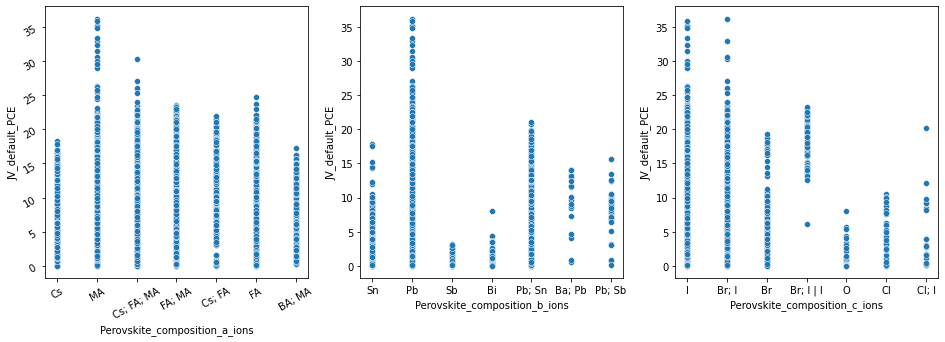

In [495]:
# Perovskite 소재에 따른 PCE 효율 비교
a_ions_top7 = (perovskite_subdf['Perovskite_composition_a_ions'] == 'MA') \
                | (perovskite_subdf['Perovskite_composition_a_ions'] == 'FA; MA') \
                | (perovskite_subdf['Perovskite_composition_a_ions'] == 'Cs; FA; MA') \
                | (perovskite_subdf['Perovskite_composition_a_ions'] == 'Cs') \
                | (perovskite_subdf['Perovskite_composition_a_ions'] == 'Cs; FA') \
                | (perovskite_subdf['Perovskite_composition_a_ions'] == 'FA') \
                | (perovskite_subdf['Perovskite_composition_a_ions'] == 'BA; MA') 

perovskite_subdf['Perovskite_composition_b_ions'] = perovskite_subdf['Perovskite_composition_b_ions'].replace('Pb | Pb', 'Pb')
b_ions_top7 = (perovskite_subdf['Perovskite_composition_b_ions'] == 'Pb') \
                | (perovskite_subdf['Perovskite_composition_b_ions'] == 'Sn') \
                | (perovskite_subdf['Perovskite_composition_b_ions'] == 'Sn') \
                | (perovskite_subdf['Perovskite_composition_b_ions'] == 'Pb; Sn') \
                | (perovskite_subdf['Perovskite_composition_b_ions'] == 'Bi') \
                | (perovskite_subdf['Perovskite_composition_b_ions'] == 'Sb') \
                | (perovskite_subdf['Perovskite_composition_b_ions'] == 'Pb; Sb') \
                | (perovskite_subdf['Perovskite_composition_b_ions'] == 'Ba; Pb') 

perovskite_subdf['Perovskite_composition_c_ions'] = perovskite_subdf['Perovskite_composition_c_ions'].replace('I | I', 'I')
perovskite_subdf['Perovskite_composition_c_ions'] = perovskite_subdf['Perovskite_composition_c_ions'].replace('Br; I | Br; I', 'Br; I')
c_ions_top7 = (perovskite_subdf['Perovskite_composition_c_ions'] == 'I') \
                | (perovskite_subdf['Perovskite_composition_c_ions'] == 'Br; I') \
                | (perovskite_subdf['Perovskite_composition_c_ions'] == 'Br') \
                | (perovskite_subdf['Perovskite_composition_c_ions'] == 'Br; I | I') \
                | (perovskite_subdf['Perovskite_composition_c_ions'] == 'O') \
                | (perovskite_subdf['Perovskite_composition_c_ions'] == 'Cl') \
                | (perovskite_subdf['Perovskite_composition_c_ions'] == 'Cl; I') \


fig, axs = plt.subplots(figsize=(16, 5), ncols=3)

ax1 = sns.scatterplot(x='Perovskite_composition_a_ions', y='JV_default_PCE', data=perovskite_subdf[a_ions_top7], ax=axs[0])
ax1.tick_params(labelrotation=30)
sns.scatterplot(x='Perovskite_composition_b_ions', y='JV_default_PCE', data=perovskite_subdf[b_ions_top7], ax=axs[1])
sns.scatterplot(x='Perovskite_composition_c_ions', y='JV_default_PCE', data=perovskite_subdf[c_ions_top7], ax=axs[2])

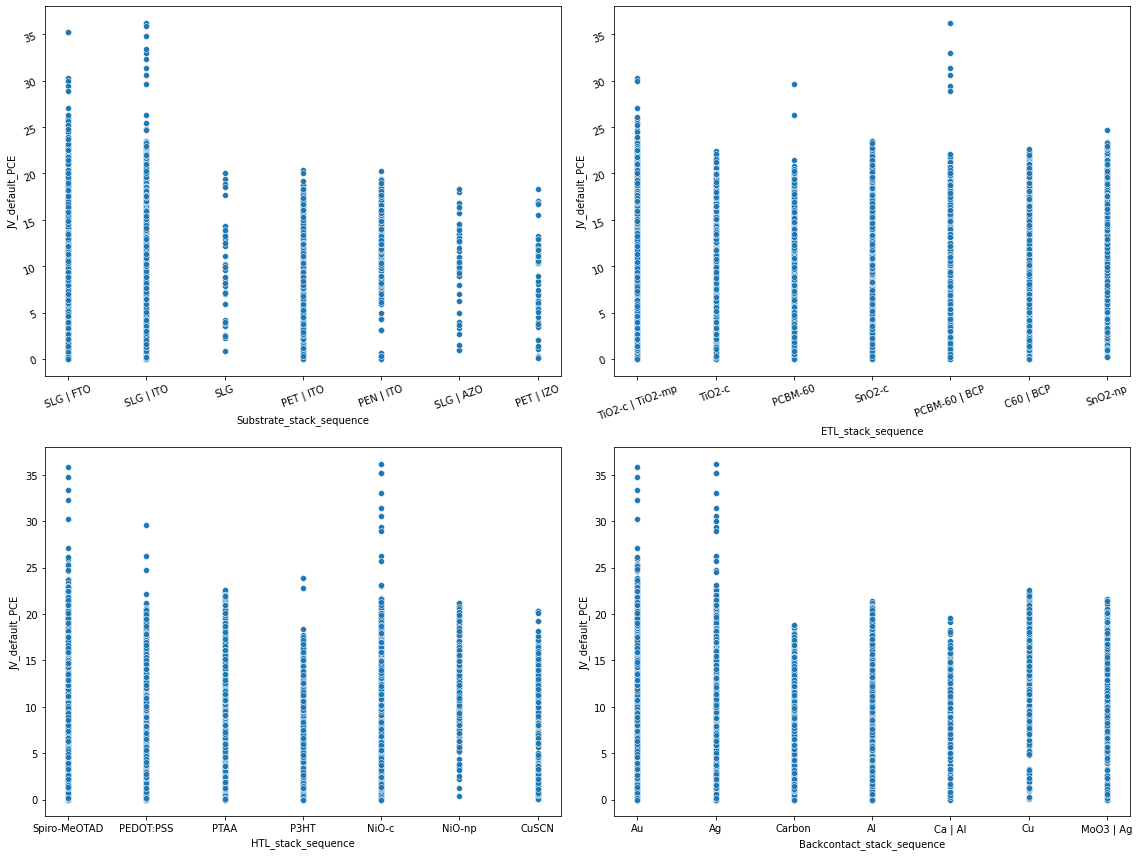

In [496]:
# stack 소재에 대한 PCE 효율 비교
stack_df = origin_df.copy()
stack_df = stack_df.drop(stack_df.filter(regex='^Ref|^JV.*(?<!default_PCE)$', axis=1).columns, axis=1)
stack_df = stack_df.loc[:, stack_df.isna().sum() < 20000]
stack_df = stack_df.dropna(subset=['JV_default_PCE']).reset_index(drop=True)

# stack_df.groupby('Backcontact_stack_sequence').size().nlargest(8)

Substrate_stack_top7 = (stack_df['Substrate_stack_sequence'] == 'SLG | FTO') \
                | (stack_df['Substrate_stack_sequence'] == 'SLG | ITO') \
                | (stack_df['Substrate_stack_sequence'] == 'PET | ITO') \
                | (stack_df['Substrate_stack_sequence'] == 'PEN | ITO') \
                | (stack_df['Substrate_stack_sequence'] == 'PET | IZO') \
                | (stack_df['Substrate_stack_sequence'] == 'SLG | AZO') \
                | (stack_df['Substrate_stack_sequence'] == 'SLG') 

ETL_stack_top7 = (stack_df['ETL_stack_sequence'] == 'TiO2-c | TiO2-mp') \
                | (stack_df['ETL_stack_sequence'] == 'TiO2-c') \
                | (stack_df['ETL_stack_sequence'] == 'PCBM-60') \
                | (stack_df['ETL_stack_sequence'] == 'PCBM-60 | BCP') \
                | (stack_df['ETL_stack_sequence'] == 'SnO2-np') \
                | (stack_df['ETL_stack_sequence'] == 'C60 | BCP') \
                | (stack_df['ETL_stack_sequence'] == 'SnO2-c') 

HTL_stack_top7 = (stack_df['HTL_stack_sequence'] == 'Spiro-MeOTAD') \
                | (stack_df['HTL_stack_sequence'] == 'PEDOT:PSS') \
                | (stack_df['HTL_stack_sequence'] == 'PTAA') \
                | (stack_df['HTL_stack_sequence'] == 'NiO-c') \
                | (stack_df['HTL_stack_sequence'] == 'P3HT') \
                | (stack_df['HTL_stack_sequence'] == 'NiO-np') \
                | (stack_df['HTL_stack_sequence'] == 'CuSCN') 

Backcontact_stack_top7 = (stack_df['Backcontact_stack_sequence'] == 'Au') \
                | (stack_df['Backcontact_stack_sequence'] == 'Ag') \
                | (stack_df['Backcontact_stack_sequence'] == 'Al') \
                | (stack_df['Backcontact_stack_sequence'] == 'Carbon') \
                | (stack_df['Backcontact_stack_sequence'] == 'MoO3 | Ag') \
                | (stack_df['Backcontact_stack_sequence'] == 'Cu') \
                | (stack_df['Backcontact_stack_sequence'] == 'Ca | Al') 



fig, axs = plt.subplots(figsize=(16, 12), ncols=2, nrows=2)

ax1 = sns.scatterplot(x='Substrate_stack_sequence', y='JV_default_PCE', data=stack_df[Substrate_stack_top7], ax=axs[0][0])
ax2 = sns.scatterplot(x='ETL_stack_sequence', y='JV_default_PCE', data=stack_df[ETL_stack_top7], ax=axs[0][1])
ax3 = sns.scatterplot(x='HTL_stack_sequence', y='JV_default_PCE', data=stack_df[HTL_stack_top7], ax=axs[1][0])
ax4 = sns.scatterplot(x='Backcontact_stack_sequence', y='JV_default_PCE', data=stack_df[Backcontact_stack_top7], ax=axs[1][1])

ax1.tick_params(labelrotation=20)
ax2.tick_params(labelrotation=20)
plt.tight_layout()

### PCA

In [497]:
# PCA 적용 전 X, y값 정의
y = df['JV_default_PCE']
X = df[df.columns.difference(['JV_default_PCE'])]

# X 표준화
scaler = StandardScaler().fit(X)
X_std = scaler.transform(X)

In [498]:
# PCA n값별 설명력 살펴보기
for i in range(1, X_std.shape[1]):
    print(i)
    pca = PCA(n_components=i)
    pca_transformed = pca.fit_transform(X_std)

    print(pca.explained_variance_ratio_, pca.explained_variance_ratio_.sum())
    print()

1
[0.07641386] 0.0764138576868557

2
[0.07641386 0.0587094 ] 0.1351232590981756

3
[0.07641386 0.0587094  0.05413609] 0.18925934940422368

4
[0.07641386 0.0587094  0.05413609 0.04526384] 0.23452318763313315

5
[0.07641386 0.0587094  0.05413609 0.04526385 0.03543228] 0.269955477248487

6
[0.07641386 0.0587094  0.05413609 0.04526385 0.03543205 0.03034506] 0.3003003066909621

7
[0.07641386 0.0587094  0.05413609 0.04526384 0.03543225 0.03034475
 0.02709482] 0.327395018265247

8
[0.07641386 0.0587094  0.05413609 0.04526385 0.03543228 0.03034487
 0.02709514 0.02458961] 0.3519850861671512

9
[0.07641386 0.0587094  0.05413609 0.04526385 0.03543227 0.03034508
 0.02709453 0.02458916 0.02383357] 0.37581780642342255

10
[0.07641386 0.0587094  0.05413609 0.04526385 0.03543228 0.03034506
 0.02709505 0.02458956 0.02383183 0.02181456] 0.3976315401790042

11
[0.07641386 0.0587094  0.05413609 0.04526385 0.03543228 0.03034513
 0.02709509 0.02458985 0.02383387 0.02181415 0.02047005] 0.41810361995127304

1

[0.07641386 0.0587094  0.05413609 0.04526384 0.03543225 0.03034509
 0.02709514 0.02459018 0.02383289 0.02181626 0.02047834 0.01901973
 0.01810846 0.0176704  0.01662024 0.01611931 0.01488429 0.01449992
 0.01370702 0.01324712 0.0129237  0.01229213 0.01128458 0.01079945
 0.01069389 0.01045213 0.01028632 0.01008644 0.01001183 0.00986529
 0.00962676 0.00961743 0.00958763 0.00927735 0.00921063 0.00904188
 0.00879425] 0.7358414995343032

38
[0.07641386 0.0587094  0.05413609 0.04526385 0.03543226 0.03034508
 0.02709519 0.02459021 0.02383365 0.02181667 0.02048027 0.01902035
 0.01811162 0.01767449 0.01662429 0.01612084 0.01486698 0.01450345
 0.01370529 0.01326559 0.01292681 0.01226265 0.01127117 0.01089899
 0.01067566 0.0104768  0.01034984 0.01006991 0.00998928 0.00981263
 0.0097732  0.00974995 0.00957051 0.0093302  0.00922895 0.00888247
 0.00883769 0.00873827] 0.7448543922010217

39
[0.07641386 0.0587094  0.05413609 0.04526385 0.03543223 0.03034509
 0.02709526 0.02459012 0.02383356 0.02181665 0

[0.07641386 0.0587094  0.05413609 0.04526385 0.03543228 0.03034515
 0.02709541 0.02459046 0.02383412 0.02181695 0.02048067 0.01902156
 0.01811414 0.01767722 0.01662677 0.01612471 0.0148892  0.01452846
 0.01373362 0.01328516 0.01296109 0.01231731 0.01130772 0.01095766
 0.01074257 0.01056092 0.01048333 0.01013774 0.01006596 0.01001021
 0.00988353 0.00981677 0.00969985 0.00945549 0.00942724 0.00915067
 0.00899551 0.00885345 0.0088194  0.00876296 0.0087106  0.00865884
 0.00848208 0.00838394 0.00831276 0.00825296 0.00786366 0.0077586
 0.00765911 0.00748809 0.00735449 0.00726563 0.00698824] 0.8677074673686248

54
[0.07641386 0.0587094  0.05413609 0.04526385 0.03543228 0.03034514
 0.02709541 0.02459047 0.02383412 0.021817   0.02048068 0.01902129
 0.01811431 0.01767719 0.01662662 0.01612482 0.01488996 0.01452753
 0.01373187 0.01328391 0.01296053 0.01231614 0.01131413 0.01095905
 0.0107417  0.01055923 0.01048117 0.01013194 0.01006267 0.01002045
 0.00988581 0.00979743 0.00969523 0.00947003 0.009

[0.07641386 0.0587094  0.05413609 0.04526385 0.03543228 0.03034515
 0.02709541 0.02459047 0.02383413 0.02181701 0.0204807  0.01902163
 0.01811437 0.01767733 0.01662699 0.01612498 0.01489003 0.01452888
 0.01373385 0.01328535 0.01296162 0.01231888 0.01131487 0.01096344
 0.01074806 0.01056442 0.01048818 0.0101443  0.01006823 0.01002439
 0.00989184 0.00984471 0.00970829 0.00947506 0.00943501 0.00917835
 0.00900749 0.00886379 0.00883732 0.0087815  0.0087162  0.00866831
 0.00848919 0.00840441 0.00832494 0.00828689 0.00791974 0.00781501
 0.00770907 0.00757234 0.00744856 0.00734465 0.00716295 0.00695402
 0.00679516 0.00664559 0.00657289 0.0064761  0.00618534 0.00587038
 0.0057659  0.00562476 0.00542957 0.00536103 0.00514357 0.00485696] 0.9462850188277514

67
[0.07641386 0.0587094  0.05413609 0.04526385 0.03543228 0.03034515
 0.02709541 0.02459047 0.02383413 0.02181701 0.0204807  0.01902163
 0.01811437 0.01767733 0.01662699 0.01612498 0.01489003 0.01452888
 0.01373385 0.01328535 0.01296161 0.01

[0.07641386 0.0587094  0.05413609 0.04526385 0.03543228 0.03034515
 0.02709541 0.02459047 0.02383413 0.02181701 0.0204807  0.01902163
 0.01811437 0.01767733 0.01662699 0.01612498 0.01489003 0.01452888
 0.01373386 0.01328535 0.01296162 0.01231888 0.01131487 0.01096344
 0.01074807 0.01056443 0.01048818 0.01014431 0.01006829 0.01002441
 0.00989187 0.00984471 0.00970831 0.00947518 0.00943502 0.00917836
 0.00900754 0.00886379 0.00883754 0.00878153 0.00871625 0.00866863
 0.0084892  0.00840447 0.00832495 0.00828691 0.00791986 0.00781505
 0.00770915 0.00757243 0.0074486  0.00734471 0.00716372 0.00695429
 0.00679577 0.00664591 0.00657322 0.00647613 0.0061856  0.00587096
 0.00576641 0.0056275  0.00543076 0.00536119 0.00514383 0.00485864
 0.00473956 0.00449657 0.00401023 0.00378065 0.00363692 0.0034945
 0.00314707 0.0030894  0.00290182 0.00255214 0.00236774] 0.9845128306036932

78
[0.07641386 0.0587094  0.05413609 0.04526385 0.03543228 0.03034515
 0.02709541 0.02459047 0.02383413 0.02181701 0.020

[0.07641386 0.0587094  0.05413609 0.04526385 0.03543228 0.03034515
 0.02709541 0.02459047 0.02383413 0.02181701 0.0204807  0.01902163
 0.01811437 0.01767733 0.01662699 0.01612498 0.01489003 0.01452888
 0.01373386 0.01328535 0.01296162 0.01231888 0.01131487 0.01096344
 0.01074807 0.01056443 0.01048818 0.01014431 0.01006829 0.01002441
 0.00989187 0.00984471 0.00970831 0.00947518 0.00943502 0.00917836
 0.00900754 0.00886379 0.00883754 0.00878153 0.00871625 0.00866863
 0.0084892  0.00840447 0.00832495 0.00828691 0.00791986 0.00781505
 0.00770915 0.00757243 0.0074486  0.00734471 0.00716372 0.00695429
 0.00679577 0.00664591 0.00657322 0.00647613 0.0061856  0.00587096
 0.00576641 0.0056275  0.00543076 0.00536119 0.00514383 0.00485864
 0.00473956 0.00449657 0.00401023 0.00378065 0.00363692 0.0034945
 0.00314707 0.0030894  0.00290182 0.00255214 0.00236774 0.00229148
 0.0021851  0.00200681 0.00170186 0.00139805 0.00106883 0.00095419
 0.00091526 0.0008507 ] 0.997885104771502

87
[0.07641386 0.058

[7.64138577e-02 5.87094016e-02 5.41360902e-02 4.52638493e-02
 3.54322847e-02 3.03451508e-02 2.70954095e-02 2.45904732e-02
 2.38341289e-02 2.18170082e-02 2.04806982e-02 1.90216298e-02
 1.81143716e-02 1.76773341e-02 1.66269933e-02 1.61249821e-02
 1.48900309e-02 1.45288807e-02 1.37338550e-02 1.32853483e-02
 1.29616157e-02 1.23188800e-02 1.13148732e-02 1.09634403e-02
 1.07480660e-02 1.05644309e-02 1.04881807e-02 1.01443080e-02
 1.00682857e-02 1.00244067e-02 9.89187150e-03 9.84471350e-03
 9.70830867e-03 9.47517658e-03 9.43501890e-03 9.17835718e-03
 9.00754031e-03 8.86379408e-03 8.83753909e-03 8.78152588e-03
 8.71624565e-03 8.66862926e-03 8.48920420e-03 8.40447148e-03
 8.32494887e-03 8.28691173e-03 7.91986035e-03 7.81504721e-03
 7.70915148e-03 7.57242571e-03 7.44860184e-03 7.34470503e-03
 7.16372020e-03 6.95428801e-03 6.79577346e-03 6.64590930e-03
 6.57321891e-03 6.47612907e-03 6.18560099e-03 5.87095937e-03
 5.76640539e-03 5.62750075e-03 5.43076331e-03 5.36118943e-03
 5.14382691e-03 4.858639

[7.64138577e-02 5.87094016e-02 5.41360902e-02 4.52638493e-02
 3.54322847e-02 3.03451508e-02 2.70954095e-02 2.45904732e-02
 2.38341289e-02 2.18170082e-02 2.04806982e-02 1.90216298e-02
 1.81143716e-02 1.76773341e-02 1.66269933e-02 1.61249821e-02
 1.48900309e-02 1.45288807e-02 1.37338550e-02 1.32853483e-02
 1.29616157e-02 1.23188800e-02 1.13148732e-02 1.09634403e-02
 1.07480660e-02 1.05644309e-02 1.04881807e-02 1.01443080e-02
 1.00682857e-02 1.00244067e-02 9.89187150e-03 9.84471350e-03
 9.70830867e-03 9.47517658e-03 9.43501890e-03 9.17835718e-03
 9.00754031e-03 8.86379408e-03 8.83753909e-03 8.78152588e-03
 8.71624565e-03 8.66862926e-03 8.48920420e-03 8.40447148e-03
 8.32494887e-03 8.28691173e-03 7.91986035e-03 7.81504721e-03
 7.70915148e-03 7.57242571e-03 7.44860184e-03 7.34470503e-03
 7.16372020e-03 6.95428801e-03 6.79577346e-03 6.64590930e-03
 6.57321891e-03 6.47612907e-03 6.18560099e-03 5.87095937e-03
 5.76640539e-03 5.62750075e-03 5.43076331e-03 5.36118943e-03
 5.14382691e-03 4.858639

[7.64138577e-02 5.87094016e-02 5.41360902e-02 4.52638493e-02
 3.54322847e-02 3.03451508e-02 2.70954095e-02 2.45904732e-02
 2.38341289e-02 2.18170082e-02 2.04806982e-02 1.90216298e-02
 1.81143716e-02 1.76773341e-02 1.66269933e-02 1.61249821e-02
 1.48900309e-02 1.45288807e-02 1.37338550e-02 1.32853483e-02
 1.29616157e-02 1.23188800e-02 1.13148732e-02 1.09634403e-02
 1.07480660e-02 1.05644309e-02 1.04881807e-02 1.01443080e-02
 1.00682857e-02 1.00244067e-02 9.89187150e-03 9.84471350e-03
 9.70830867e-03 9.47517658e-03 9.43501890e-03 9.17835718e-03
 9.00754031e-03 8.86379408e-03 8.83753909e-03 8.78152588e-03
 8.71624565e-03 8.66862926e-03 8.48920420e-03 8.40447148e-03
 8.32494887e-03 8.28691173e-03 7.91986035e-03 7.81504721e-03
 7.70915148e-03 7.57242571e-03 7.44860184e-03 7.34470503e-03
 7.16372020e-03 6.95428801e-03 6.79577346e-03 6.64590930e-03
 6.57321891e-03 6.47612907e-03 6.18560099e-03 5.87095937e-03
 5.76640539e-03 5.62750075e-03 5.43076331e-03 5.36118943e-03
 5.14382691e-03 4.858639

[7.64138577e-02 5.87094016e-02 5.41360902e-02 4.52638493e-02
 3.54322847e-02 3.03451508e-02 2.70954095e-02 2.45904732e-02
 2.38341289e-02 2.18170082e-02 2.04806982e-02 1.90216298e-02
 1.81143716e-02 1.76773341e-02 1.66269933e-02 1.61249821e-02
 1.48900309e-02 1.45288807e-02 1.37338550e-02 1.32853483e-02
 1.29616157e-02 1.23188800e-02 1.13148732e-02 1.09634403e-02
 1.07480660e-02 1.05644309e-02 1.04881807e-02 1.01443080e-02
 1.00682857e-02 1.00244067e-02 9.89187150e-03 9.84471350e-03
 9.70830867e-03 9.47517658e-03 9.43501890e-03 9.17835718e-03
 9.00754031e-03 8.86379408e-03 8.83753909e-03 8.78152588e-03
 8.71624565e-03 8.66862926e-03 8.48920420e-03 8.40447148e-03
 8.32494887e-03 8.28691173e-03 7.91986035e-03 7.81504721e-03
 7.70915148e-03 7.57242571e-03 7.44860184e-03 7.34470503e-03
 7.16372020e-03 6.95428801e-03 6.79577346e-03 6.64590930e-03
 6.57321891e-03 6.47612907e-03 6.18560099e-03 5.87095937e-03
 5.76640539e-03 5.62750075e-03 5.43076331e-03 5.36118943e-03
 5.14382691e-03 4.858639

In [551]:
# 96.3% 정도의 설명력을 가진 70개로 PCA 적용
pca = PCA(n_components=70)
pca_transformed = pca.fit_transform(X)
X_pca = pca_transformed

### Tree 기반 모델

In [552]:
def rmsle(y, pred) :
    log_y = np.log1p(y)
    log_pred = np.log1p(pred)
    squared_error = (log_y - log_pred) **2
    rmsle = np.sqrt(np.mean(squared_error))
    return rmsle

def evaluate_regr(y, pred) :
    mse_val = mean_squared_error(y, pred)
    rmsle_val = rmsle(y, pred)
    rmse_val = np.sqrt(mean_squared_error(y, pred))
    mae_val = mean_absolute_error(y, pred)    
    print('MSE : {0:.3f}, RMSLE : {1:.3f}, RMSE : {2:.3f}, MAE : {3:.3f}'.format(mse_val, rmsle_val, rmse_val, mae_val))

def print_best_params(model, params) :
    grid_model = GridSearchCV(model, param_grid=params, scoring='neg_mean_squared_error', cv=5)
    grid_model.fit(X_train, y_train)
    rmse = np.sqrt(-1*grid_model.best_score_)
    print('{0} 5 CV 시 최적 평균 RMSE 값 : {1}, 최적 alpha : {2}'.format(model.__class__.__name__, np.round(rmse, 4), grid_model.best_params_))
    
def get_top_bottom_coef(model, n=10) :
    coef = pd.Series(model.coef_, index=X.columns)
    
    #  상위 10개, 하위 10개의 회귀 계수를 추출해 반환
    coef_hight = coef.sort_values(ascending=False).head(n)
    coef_low = coef.sort_values(ascending=False).tail(n)
    return coef_hight, coef_low
    
def visualize_coefficient(model) :
    coef_high, coef_low = get_top_bottom_coef(model)
    coef_concat = pd.concat([coef_high, coef_low])
    
    plt.title(model.__class__.__name__+' Coeffiecents')
    sns.barplot(x=coef_concat.values, y=coef_concat.index)
    
def visualize_feature_importance(model) :
    feature_importance = pd.DataFrame(sorted(zip(model.feature_importances_, X_test.columns)), columns=['Value','Feature'])
    df_sort_group_top10 = feature_importance.sort_values(by="Value", ascending=False).head(10)

    plt.figure(figsize=(10, 6))

    sns.barplot(x="Value", y="Feature", data=df_sort_group_top10)
    plt.title(model.__class__.__name__+' Coeffiecents')
    plt.tight_layout()
    plt.show()   
    
def visualize_corr(model, cnt=10) :
    plt.figure(figsize = (20,10))

    feature_importance = pd.DataFrame(sorted(zip(model.feature_importances_, X_test.columns)), columns=['Value','Feature'])
    df_sort_group_top = feature_importance.sort_values(by="Value", ascending=False).head(cnt)
    top = list(df_sort_group_top['Feature'])
    top.append('JV_default_PCE')
    sns.heatmap(df[top].corr(),annot = True)
    plt.show()

In [553]:
# LightGBM 모델 사용을 위해 컬럼명에 특수문자 제거
df = df.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))

In [554]:
y = df['JV_default_PCE']
X = df[df.columns.difference(['JV_default_PCE'])]

#### LGBMRegressor

MSE : 12.858, RMSLE : 0.441, RMSE : 3.586, MAE : 2.771


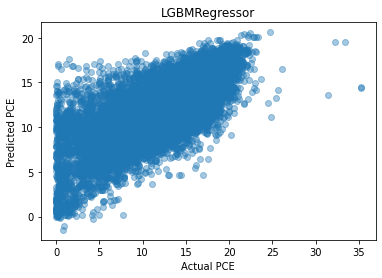

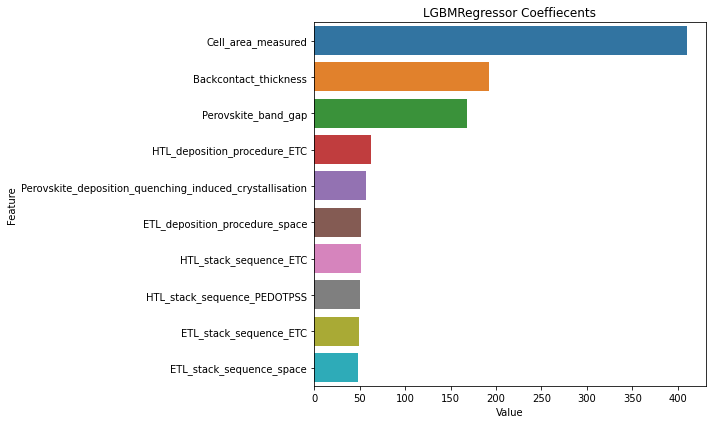

In [555]:
#y = df['JV_default_PCE']
#X = df[df.columns.difference(['JV_default_PCE'])]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=22)

lgbm = LGBMRegressor()
lgbm.fit(X_train, y_train)
y_pred = lgbm.predict(X_test)

evaluate_regr(y_test, y_pred)

plt.scatter(y_test, y_pred, alpha=0.4)
plt.xlabel("Actual PCE")
plt.ylabel("Predicted PCE")
plt.title("LGBMRegressor")
plt.show()

visualize_feature_importance(lgbm)

MSE : 9.187, RMSLE : 0.374, RMSE : 3.031, MAE : 2.184


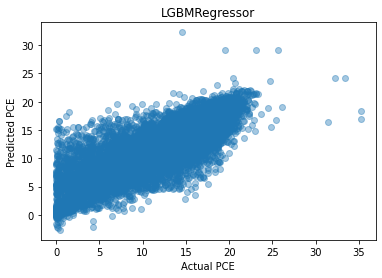

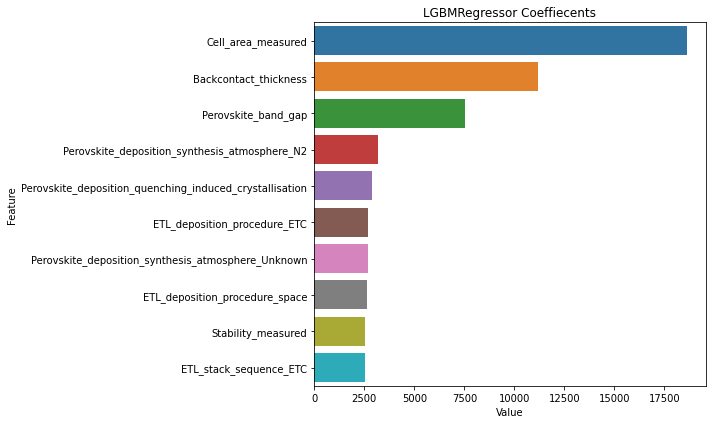

In [556]:
#y = df['JV_default_PCE']
#X = df[df.columns.difference(['JV_default_PCE'])]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=22)

lgbm = LGBMRegressor(n_estimators=4000)
lgbm.fit(X_train, y_train)
y_pred = lgbm.predict(X_test)

evaluate_regr(y_test, y_pred)

plt.scatter(y_test, y_pred, alpha=0.4)
plt.xlabel("Actual PCE")
plt.ylabel("Predicted PCE")
plt.title("LGBMRegressor")
plt.show()

visualize_feature_importance(lgbm)

삭제전 :  (41519, 114)
삭제후 :  (41489, 114)
MSE : 9.293, RMSLE : 0.387, RMSE : 3.049, MAE : 2.204


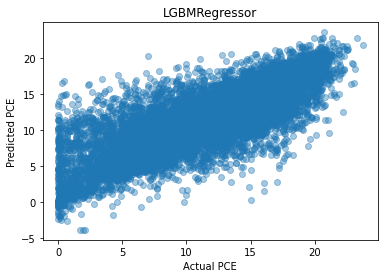

In [557]:
# 이상치 삭제 후 다시 학습
df_copy = df.copy()

# 1% 안되는 이상치들은 삭제
print('삭제전 : ', df_copy.shape)
df_copy.drop(df_copy[df_copy['JV_default_PCE'] > 24].index, axis=0, inplace=True)
print('삭제후 : ', df_copy.shape)

y_cp = df_copy['JV_default_PCE']
X_cp = df_copy[df_copy.columns.difference(['JV_default_PCE'])]

X_train, X_test, y_train, y_test = train_test_split(X_cp, y_cp, test_size=0.3, random_state=22)

lgbm = LGBMRegressor(n_estimators=4000)
lgbm.fit(X_train, y_train)
y_pred = lgbm.predict(X_test)

evaluate_regr(y_test, y_pred)

plt.scatter(y_test, y_pred, alpha=0.4)
plt.xlabel("Actual PCE")
plt.ylabel("Predicted PCE")
plt.title("LGBMRegressor")
plt.show()

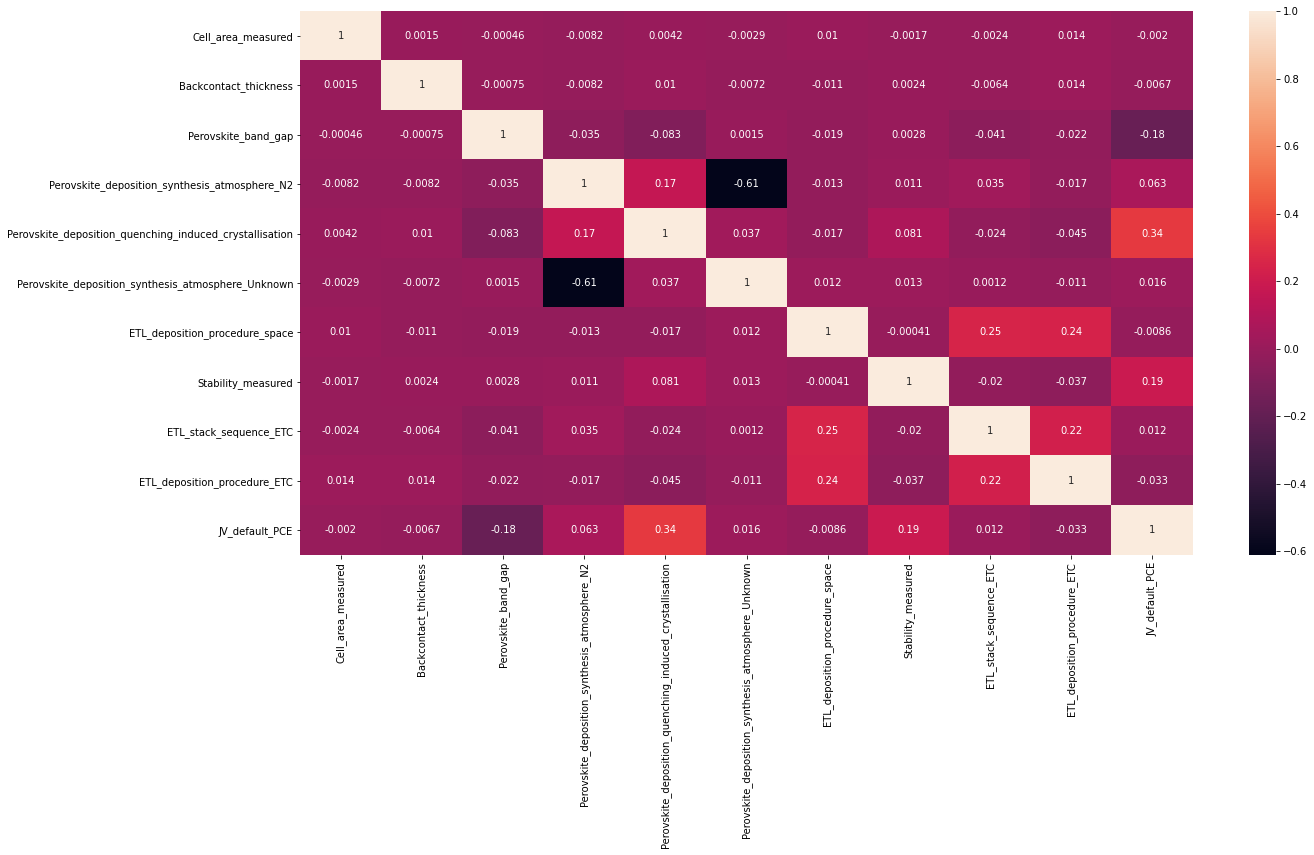

In [558]:
visualize_corr(lgbm, 10)

MSE : 9.780, RMSLE : 0.384, RMSE : 3.127, MAE : 2.231


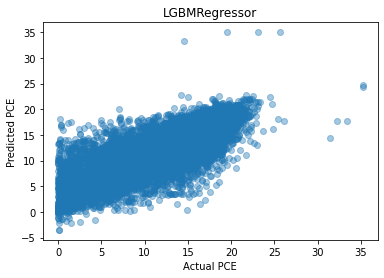

In [559]:
# PCA
# y = df['JV_default_PCE']
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=22)

lgbm = LGBMRegressor(n_estimators=4000)
lgbm.fit(X_train, y_train)
y_pred = lgbm.predict(X_test)

evaluate_regr(y_test, y_pred)

plt.scatter(y_test, y_pred, alpha=0.4)
plt.xlabel("Actual PCE")
plt.ylabel("Predicted PCE")
plt.title("LGBMRegressor")
plt.show()

#visualize_feature_importance(lgbm)

#### RandomForestRegressor

MSE : 9.396, RMSLE : 0.372, RMSE : 3.065, MAE : 2.201


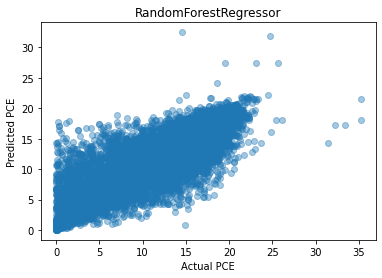

In [560]:
y = df['JV_default_PCE']
X = df[df.columns.difference(['JV_default_PCE'])]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=22)

rf = RandomForestRegressor(random_state=22)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

evaluate_regr(y_test, rf_pred)

plt.scatter(y_test, rf_pred, alpha=0.4)
plt.xlabel("Actual PCE")
plt.ylabel("Predicted PCE")
plt.title("RandomForestRegressor")
plt.show()

삭제전 :  (41519, 114)
삭제후 :  (41489, 114)
MSE : 9.557, RMSLE : 0.382, RMSE : 3.091, MAE : 2.227


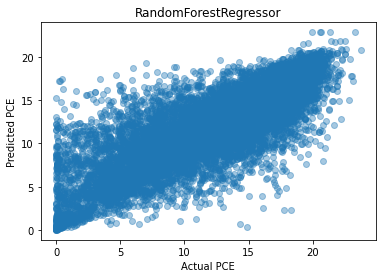

In [561]:
# 이상치 삭제 후 다시 학습
df_copy = df.copy()

# 1% 안되는 이상치들은 삭제
print('삭제전 : ', df_copy.shape)
df_copy.drop(df_copy[df_copy['JV_default_PCE'] > 24].index, axis=0, inplace=True)
print('삭제후 : ', df_copy.shape)

y_cp = df_copy['JV_default_PCE']
X_cp = df_copy[df_copy.columns.difference(['JV_default_PCE'])]

X_train, X_test, y_train, y_test = train_test_split(X_cp, y_cp, test_size=0.3, random_state=22)

rf = RandomForestRegressor(random_state=22)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

evaluate_regr(y_test, rf_pred)

plt.scatter(y_test, rf_pred, alpha=0.4)
plt.xlabel("Actual PCE")
plt.ylabel("Predicted PCE")
plt.title("RandomForestRegressor")
plt.show()

MSE : 9.976, RMSLE : 0.387, RMSE : 3.158, MAE : 2.291


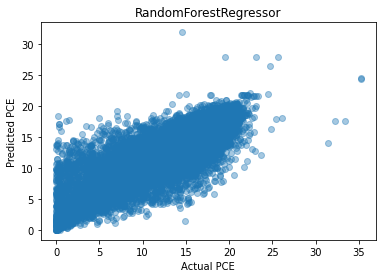

In [562]:
# PCA
#y = df['JV_default_PCE']
#X = df[df.columns.difference(['JV_default_PCE'])]
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=22)

rf = RandomForestRegressor(random_state=22)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

evaluate_regr(y_test, rf_pred)

plt.scatter(y_test, rf_pred, alpha=0.4)
plt.xlabel("Actual PCE")
plt.ylabel("Predicted PCE")
plt.title("RandomForestRegressor")
plt.show()

신규 컬럼 추가에 대한 성능 비교

In [563]:
# df_new_ = df_copy.copy()
# df_new_.filter(regex='procedure_space$').columns

In [564]:
# df_new_ = df_copy.copy()
# print('삭제전 : ', df_new_.shape)
# df_new_.drop('ETL_deposition_procedure_space', axis=1, inplace=True)
# df_new_.drop('HTL_deposition_procedure_space', axis=1, inplace=True)
# df_new_.drop('Backcontact_deposition_procedure_space', axis=1, inplace=True)
# print('삭제후 : ', df_new_.shape)

# y = df_new_['JV_default_PCE']
# X = df_new_[df_new_.columns.difference(['JV_default_PCE'])]

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=22)

# lgbm = LGBMRegressor(n_estimators=4000)
# lgbm.fit(X_train, y_train)
# y_pred = lgbm.predict(X_test)

# evaluate_regr(y_test, y_pred)

### 선형 회귀 모델

In [565]:
#y = df['JV_default_PCE']
#X = df[df.columns.difference(['JV_default_PCE'])]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=22)

ridge_reg = Ridge()
ridge_reg.fit(X_train, y_train)
ridge_params = {'alpha':[0.05, 0.1, 1, 5, 8, 10, 12, 15, 20]}

lasso_reg = Lasso()
lasso_reg.fit(X_train, y_train)
lasso_params = {'alpha':[0.001, 0.005, 0.008, 0.05, 0.03, 0.1, 0.5, 1, 5, 10]}

print_best_params(ridge_reg, ridge_params)
print_best_params(lasso_reg, lasso_params)

Ridge 5 CV 시 최적 평균 RMSE 값 : 4.0244, 최적 alpha : {'alpha': 5}
Lasso 5 CV 시 최적 평균 RMSE 값 : 4.0249, 최적 alpha : {'alpha': 0.001}


#### LinearRegression

MSE : 16.415, RMSLE : 0.492, RMSE : 4.052, MAE : 3.171


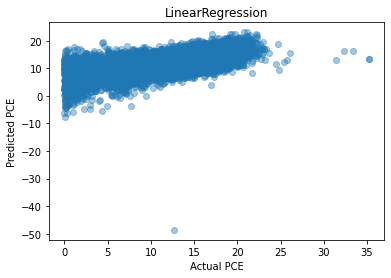

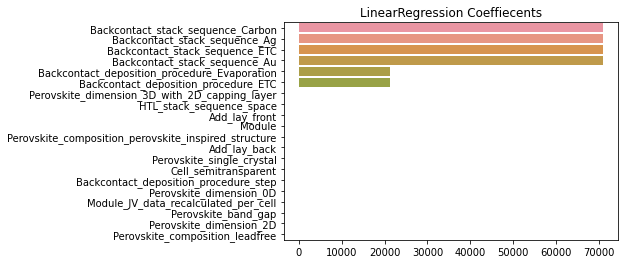

In [566]:
#y = df['JV_default_PCE']
#X = df[df.columns.difference(['JV_default_PCE'])]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=22)

lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
lr_y_pred = lr_reg.predict(X_test)

evaluate_regr(y_test, lr_y_pred)

plt.scatter(y_test, lr_y_pred, alpha=0.4)
plt.xlabel("Actual PCE")
plt.ylabel("Predicted PCE")
plt.title("LinearRegression")
plt.show()

visualize_coefficient(lr_reg)

삭제전 :  (41519, 114)
삭제후 :  (41474, 114)
MSE : 15.771, RMSLE : 0.492, RMSE : 3.971, MAE : 3.129


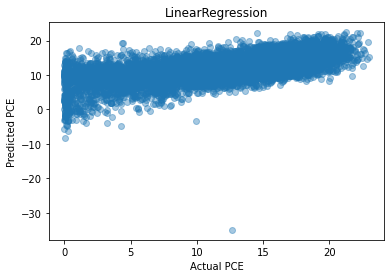

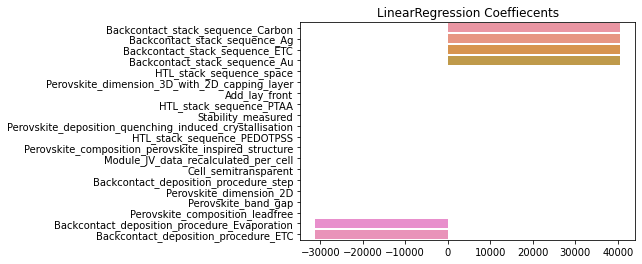

In [567]:
# 이상치 삭제 후 다시 학습
df_copy = df.copy()

# 1% 안되는 이상치들은 삭제
print('삭제전 : ', df_copy.shape)
df_copy.drop(df_copy[df_copy['JV_default_PCE'] > 23].index, axis=0, inplace=True)
print('삭제후 : ', df_copy.shape)

y_cp = df_copy['JV_default_PCE']
X_cp = df_copy[df_copy.columns.difference(['JV_default_PCE'])]

X_train, X_test, y_train, y_test = train_test_split(X_cp, y_cp, test_size=0.3, random_state=22)

lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
lr_y_pred = lr_reg.predict(X_test)

evaluate_regr(y_test, lr_y_pred)

plt.scatter(y_test, lr_y_pred, alpha=0.4)
plt.xlabel("Actual PCE")
plt.ylabel("Predicted PCE")
plt.title("LinearRegression")
plt.show()

visualize_coefficient(lr_reg)

MSE : 16.483, RMSLE : 0.498, RMSE : 4.060, MAE : 3.180


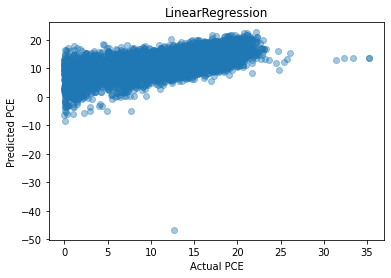

In [568]:
# PCA
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=22)

lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
lr_y_pred = lr_reg.predict(X_test)

evaluate_regr(y_test, lr_y_pred)

plt.scatter(y_test, lr_y_pred, alpha=0.4)
plt.xlabel("Actual PCE")
plt.ylabel("Predicted PCE")
plt.title("LinearRegression")
plt.show()

#### Ridge, Lasso

MSE : 16.379, RMSLE : 0.492, RMSE : 4.047, MAE : 3.171


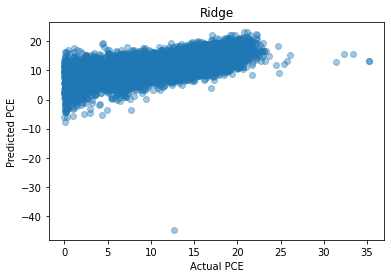

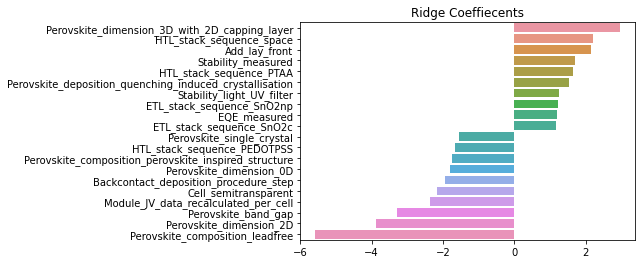

In [569]:
#y = df['JV_default_PCE']
#X = df[df.columns.difference(['JV_default_PCE'])]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=22)

ridge_reg = Ridge(alpha=5)
ridge_reg.fit(X_train, y_train)
ridge_y_pred = ridge_reg.predict(X_test)

evaluate_regr(y_test, ridge_y_pred)

plt.scatter(y_test, ridge_y_pred, alpha=0.4)
plt.xlabel("Actual PCE")
plt.ylabel("Predicted PCE")
plt.title("Ridge")
plt.show()

visualize_coefficient(ridge_reg)

MSE : 16.314, RMSLE : 0.497, RMSE : 4.039, MAE : 3.171


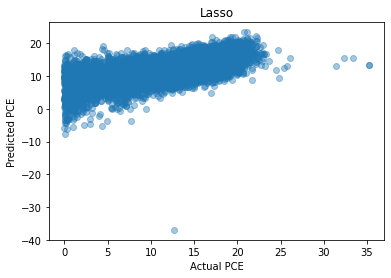

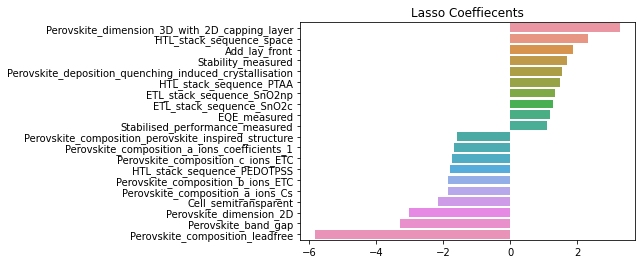

In [570]:
#y = df['JV_default_PCE']
#X = df[df.columns.difference(['JV_default_PCE'])]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=22)

lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(X_train, y_train)
lasso_y_pred = lasso_reg.predict(X_test)

evaluate_regr(y_test, lasso_y_pred)

plt.scatter(y_test, lasso_y_pred, alpha=0.4)
plt.xlabel("Actual PCE")
plt.ylabel("Predicted PCE")
plt.title("Lasso")
plt.show()

visualize_coefficient(lasso_reg)

MSE : 15.760, RMSLE : 0.491, RMSE : 3.970, MAE : 3.130


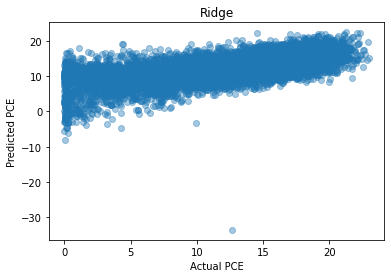

In [576]:
# outlier 제거
X_train, X_test, y_train, y_test = train_test_split(X_cp, y_cp, test_size=0.3, random_state=22)

ridge_reg = Ridge(alpha=5)
ridge_reg.fit(X_train, y_train)
ridge_y_pred = ridge_reg.predict(X_test)

evaluate_regr(y_test, ridge_y_pred)

plt.scatter(y_test, ridge_y_pred, alpha=0.4)
plt.xlabel("Actual PCE")
plt.ylabel("Predicted PCE")
plt.title("Ridge")
plt.show()

MSE : 16.483, RMSLE : 0.497, RMSE : 4.060, MAE : 3.180


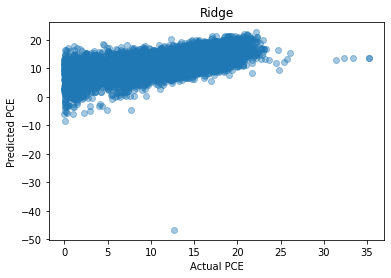

In [571]:
# PCA
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=22)

ridge_reg = Ridge(alpha=5)
ridge_reg.fit(X_train, y_train)
ridge_y_pred = ridge_reg.predict(X_test)

evaluate_regr(y_test, ridge_y_pred)

plt.scatter(y_test, ridge_y_pred, alpha=0.4)
plt.xlabel("Actual PCE")
plt.ylabel("Predicted PCE")
plt.title("Ridge")
plt.show()

#visualize_coefficient(ridge_reg)

MSE : 15.753, RMSLE : 0.492, RMSE : 3.969, MAE : 3.130


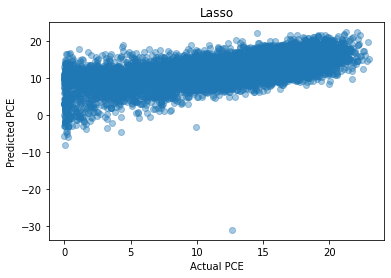

In [577]:
# 이상치 제거
X_train, X_test, y_train, y_test = train_test_split(X_cp, y_cp, test_size=0.3, random_state=22)

lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(X_train, y_train)
lasso_y_pred = lasso_reg.predict(X_test)

evaluate_regr(y_test, lasso_y_pred)

plt.scatter(y_test, lasso_y_pred, alpha=0.4)
plt.xlabel("Actual PCE")
plt.ylabel("Predicted PCE")
plt.title("Lasso")
plt.show()

#visualize_coefficient(lasso_reg)

MSE : 16.478, RMSLE : 0.495, RMSE : 4.059, MAE : 3.181


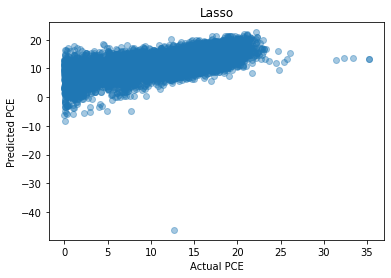

In [572]:
# PCA
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=22)

lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(X_train, y_train)
lasso_y_pred = lasso_reg.predict(X_test)

evaluate_regr(y_test, lasso_y_pred)

plt.scatter(y_test, lasso_y_pred, alpha=0.4)
plt.xlabel("Actual PCE")
plt.ylabel("Predicted PCE")
plt.title("Lasso")
plt.show()

#visualize_coefficient(lasso_reg)

In [573]:
origin_df.shape

(42443, 410)

In [574]:
df_copy.shape

(41474, 114)